# D208 Predictive Modeling

In [1]:
# imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.feature_selection import f_regression, SelectKBest, RFE
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)

## Part I: Research Question

## A1. Research Question
**Summarize one research question that is relevant to a real-world organizational situation captured in the data set you have selected and that you will answer using multiple linear regression in the initial model.**

My research question is: what are contributing factors related to a patient's length of stay? At a higher level, what variables directly influence the 'initial days' a patient stays in a hospital?

## B2. Goals of the Data Analysis. 
**Note: Ensure that your goals are within the scope of your research question and are represented in the available data.**

The general goal of the data analysis is to discover which factors influence a patient's length of stay. By uncovering which variables are correlated, whether it be patient demographics, hospital procedures or similar details, medical hospitals can utilize these findings in multiple different way such as improving patient care through better practices. Examples of improving patient care include identifying the higher risk patients (those likely to have longer stays) to possibly come up with more targeted interventions and preventative care measures. As a result of the previously mentioned benefit, hospital resources may be more optimally allocated, resulting in quick patient turnover and reduced overall medical costs for both patients and medical centers.


The purpose of data analysis for linear regression modeling is to prepare the data, uncover relationships between variables, and ensure it meets regression assumptions. This involves cleaning the data, exploring distributions and patterns, transforming variables as needed, and selecting relevant features. My goal is to identify trends and correlations between independent variables, which will aid in modeling preparation and potentially reduce dimensionality. Organizing features by data type will help manage the project and determine necessary data transformations for accurate modeling.

## Part II: Method Justification

B.  Describe multiple linear regression methods by doing the following:

### B1.  Summarize four assumptions of a multiple linear regression model.
Multiple linear regression relies on four main assumptions. These four assumptions are **linearity, independence, homoscedasticity, and normality**.

Linearity is defined as an existing linear relationship between the dependent and independent variables. Any change applied to an independent variable will effect the dependent variable linearly. A simpler way to explain this is an existing "straight line relationship between two variables" (Investopedia Linear Relationship Definition, Formula, and Examples).

Independence is defined as the residuals being independent. Residuals are also known as the error, which is the difference between a predicted value and actual value $(y-\hat{y})$. Independence among residuals implies there is no correlation between residuals. In summary, the residuals are ***normally distributed***.

Furthermore on the subject of residuals, Homoscedasticity is defined as the variance of residuals remaining constant across all independent values. A good visual would be visualizing a scatterplot with the regression line and plotted residuals. In the case of homoscedascticity, the residuals should have similar variance from their respective predicted values. In contrast, heterosceascticity would not have a constant variance among the residuals, resulting in patterns such as cone-shapes, u-shapes, etc.. (Homoscedasticity - Statistics Solutions)

Normality -- ADD HERE


### B2.  Describe two benefits of using Python or R in support of various phases of the analysis.

Python is my choice of programming language due to it's ease of use and robust use in data science. Python has many versatile libraries including numpy (numerical python operations), pandas (used for manipulation of dataframes), scipy (used for statistical operations), and matplotlib and seaborn (strong versatile visualization packages).

During the wrangling phase, Python's pandas library proves to be incredibly useful for the manipulation of dataframes, including cleaning, transforming and creating new features. Numpy is also an analyst favorite with its' powerful performance with numerical operations on arrays, which is synonymical to dataframes.

Data exploration and statistics phases also greatly benefits from the various functions within Python. The visual libraries including matplotlib and seaborn has versatile graphs that provide easy access to quick insights. Distribution charts, scatterplots and heatmaps are a few of my most used functions that help me assess the distribution and relative relation to features within the dataset. This results in decreased need for computing power as well as reduction in redundancy.

### B3.  Explain why multiple linear regression is an appropriate technique to use for analyzing the research question summarized in part I.

This technique is an algorithm used for modeling the relationship between independent feature variables and the predictor variable. In this case, the research question dependent variable is length of stay. Multiple linear regression is an appropriate algorithm for use in predicting a variable considered to be (or used as) continuous.


This is suitable for the research question because it not only allows for simultaneous research of variables that influence a patient's length of stay, (e.g. a combination of patient characteristics, health conditions and lifestyle) it allows for a deep dive into what feature variables may be associated to a patient's stay in a hospital. By quantifying the relationships between patient demographics, hospital stay information etc. this technique offers valuable insights into the range of correlation the independent and predictor variable may have. 


Furthermore, the benefits of this technique allows one to see the direct interaction between each variable and how the direct influence each other. An example could be diabetes is much more pronounced in patients in certain cities.

## Part III. Data Preparation

### C1. Data cleaning goals/steps.

`Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including your annotated code.`

In line with my previous data cleaning approach from D206, my plan is to systematically assess and clean the dataframe as needed. First, I will evaluate the data types of each column and convert them to appropriate types such as integer, float, or boolean. Next, I will identify and address any duplicates or missing values by either removing, separating, or imputing them. For this dataset, duplicates and null values are not present. Finally, I will conduct a thorough review of the data to ensure its accuracy, which may involve correcting spelling errors, fixing typos, and standardizing text formatting for readability.

To clean the dataset, I will begin by ensuring all zip codes are at least five digits by padding with zeros where necessary, addressing data loss issues from previous integer formatting. The timezone column will be standardized to align with the nine main time zones and converted to a categorical data type. Columns such as `readmission`, `soft_drink`, and other various health related variables with `yes/no` or `(1,0)` responses will be converted to boolean data types. Values in columns like `vitd_levels`, `daily_charges`, and `additional_charges` will be rounded to two decimal places. Columns such as `population`, `children`, and `income` will be corrected from float to integer types.

Columns including `marital`, `gender`, and other service-related fields will be designated as categorical data types. As columns like `income` fall within reasonable bounds, no further imputation will be applied.

In [2]:
# bring in dataframe
df = pd.read_csv('medical_raw_df.csv', index_col=[0])
# lowercase columns
df.columns = map(str.lower, df.columns)

# verify no nulls
assert df.isnull().sum().sum() == 0
# verify no duplicates
assert df.duplicated().sum() == 0

    
# change timezone column entries before changing data type
tz_dict = {
    "America/Puerto_Rico" : "US - Puerto Rico",
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    "America/Phoenix" : "US - Arizona",
    "America/Los_Angeles" : "US - Pacific",
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    "America/Adak" : "US - Aleutian",
    "Pacific/Honolulu" : 'US - Hawaiian'
    }
df.timezone.replace(tz_dict, inplace=True)

# convert zip column to str, then fill 0s in entries
df.zip = df.zip.astype('str').str.zfill(5)

# changing datatypes
# change columns to boolean data type
to_bool = ['readmis',
           'soft_drink',
           'highblood',
           'stroke',
           'overweight',
           'arthritis',
           'diabetes',
           'hyperlipidemia',
           'backpain',
           'anxiety',
           'allergic_rhinitis',
           'reflux_esophagitis',
           'asthma']

for col in to_bool:
    df[col] = df[col].replace({'Yes':1, 'No':0}).astype(bool)


# round entries in columns to only have two decimal places
round_num = ['vitd_levels',
             'totalcharge',
             'additional_charges']
for col in round_num:
    df[col] = round(df[col], 2)

# change columns to integer data type
to_int = ['population',
          'children',
          'age',
          'income',
          'initial_days']
for col in to_int:
    df[col] = df[col].astype('int32')

# change columns to categorical data type
to_cat = ['marital',
          'gender',
          'initial_admin',
          'services',
          'item1',
          'item2',
          'item3',
          'item4',
          'item5', 
          'item6',
          'item7',
          'item8',
          'timezone',
          'state',
          'complication_risk']
for col in to_cat:
    df[col] = df[col].astype('category')
      
# make columns more readable  
columns = {'caseorder':'case_order',
          'uid':'unique_id',
          'readmis':'readmission',
          'vitd_supp':'vitd_supplement',
          'highblood':'high_blood',
          'services':'services_received',
          'totalcharge':'daily_charges',
          'initial_days':'hospital_stay_days'}


df[['item1','item2', 'item3', 'item4']] = df[['item1','item2', 'item3', 'item4']].astype('int32')
df[['item5','item6', 'item7', 'item8']] = df[['item5','item6', 'item7', 'item8']].astype('int32')


df.rename(columns=columns, inplace=True)
df = df.reset_index()

In [3]:
df.head()

CaseOrder customer_id                           interaction  \
0          1     C412403  8cd49b13-f45a-4b47-a2bd-173ffa932c2f   
1          2     Z919181  d2450b70-0337-4406-bdbb-bc1037f1734c   
2          3     F995323  a2057123-abf5-4a2c-abad-8ffe33512562   
3          4     A879973  1dec528d-eb34-4079-adce-0d7a40e82205   
4          5     C544523  5885f56b-d6da-43a3-8760-83583af94266   

                          unique_id          city state        county    zip  \
0  3a83ddb66e2ae73798bdf1d705dc0932           Eva    AL        Morgan  35621   
1  176354c5eef714957d486009feabf195      Marianna    FL       Jackson  32446   
2  e19a0fa00aeda885b8a436757e889bc9   Sioux Falls    SD     Minnehaha  57110   
3  cd17d7b6d152cb6f23957346d11c3f07  New Richland    MN        Waseca  56072   
4  d2f0425877b10ed6bb381f3e2579424a    West Point    VA  King William  23181   

        lat       lng  population      area      timezone  \
0  34.34960 -86.72508        2951  Suburban  US - Central   
1  30.84513 -85.22907       11303     Urban  US - Central   
2  43.54321 -96.63772       17125  Suburban  US - Central   
3  43.89744 -93.51479        2162  Suburban  US - Central   
4  37.59894 -76.88958        5287     Rural  US - Eastern   

                                job  children  age  income   marital  gender  \
0  Psychologist, sport and exercise         1   53   86575  Divorced    Male   
1      Community development worker         3   51   46805   Married  Female   
2           Chief Executive Officer         3   53   14370   Widowed  Female   
3               Early years teacher         0   78   39741   Married    Male   
4       Health promotion specialist         1   22    1209   Widowed  Female   

   readmission  vitd_levels  doc_visits  full_meals_eaten  vitd_supplement  \
0        False        19.14           6                 0                0   
1        False        18.94           4                 2                1   
2        False        18.06           4                 1                0   
3        False        16.58           4                 1                0   
4        False        17.44           5                 0                2   

   soft_drink        initial_admin  high_blood  stroke complication_risk  \
0       False  Emergency Admission        True   False            Medium   
1       False  Emergency Admission        True   False              High   
2       False   Elective Admission        True   False            Medium   
3       False   Elective Admission       False    True            Medium   
4        True   Elective Admission       False   False               Low   

   overweight  arthritis  diabetes  hyperlipidemia  backpain  anxiety  \
0       False       True      True           False      True     True   
1        True      False     False           False     False    False   
2        True      False      True           False     False    False   
3       False       True     False           False     False    False   
4       False      False     False            True     False    False   

   allergic_rhinitis  reflux_esophagitis  asthma services_received  \
0               True               False    True        Blood Work   
1              False                True   False       Intravenous   
2              False               False   False        Blood Work   
3              False                True    True        Blood Work   
4               True               False   False           CT Scan   

   hospital_stay_days  daily_charges  additional_charges  item1  item2  item3  \
0                  10        3726.70            17939.40      3      3      2   
1                  15        4193.19            17613.00      3      4      3   
2                   4        2434.23            17505.19      2      4      4   
3                   1        2127.83            12993.44      3      5      5   
4                   1        2113.07             3716.53      2      1      3   

   i

In [4]:
# verify datatypes were changed accordingly
df.dtypes

CaseOrder                int64
customer_id             object
interaction             object
unique_id               object
city                    object
state                 category
county                  object
zip                     object
lat                    float64
lng                    float64
population               int32
area                    object
timezone              category
job                     object
children                 int32
age                      int32
income                   int32
marital               category
gender                category
readmission               bool
vitd_levels            float64
doc_visits               int64
full_meals_eaten         int64
vitd_supplement          int64
soft_drink                bool
initial_admin         category
high_blood                bool
stroke                    bool
complication_risk     category
overweight                bool
arthritis                 bool
diabetes                  bool
hyperlip

### C2.  Summary Statistics for Independent and Dependent Variable.

Describe the dependent variable and all independent variables using summary statistics that are required to answer the research question, including a screenshot of the summary statistics output for each of these variables.

In [5]:
# separate exploratory variables into type for ease of exploring

# continuous variables
cont_vars = ['age',
             'income',
             'vitd_levels',
             'daily_charges',
             'additional_charges',
             'population',
             'children',
             'doc_visits',
             'full_meals_eaten',
             'vitd_levels',
             'vitd_supplement',
             'item2',
             'item3',
             'item4',
             'item5',
             'item6',
             'item7',
             'item8']

# categorical variables
cat_vars = ['gender', 
            'marital',
            'area',
            'timezone', 
            'initial_admin',
            'complication_risk',
            'services_received']


# List of boolean health-related variables
boolean_vars = ['readmission',
                'high_blood', 
                'stroke',  
                'overweight', 
                'arthritis', 
                'diabetes', 
                'hyperlipidemia', 
                'backpain', 
                'anxiety', 
                'allergic_rhinitis', 
                'reflux_esophagitis', 
                'asthma',
                'full_meals_eaten',
                'soft_drink']

#### Target: hospital_stay_days Stats

In [6]:
print('Summary statistics for target variable `hospital_stay_days`')
round(df.hospital_stay_days.describe(),2)

Summary statistics for target variable `hospital_stay_days`


count    10000.00
mean        33.96
std         26.30
min          1.00
25%          7.00
50%         35.50
75%         61.00
max         71.00
Name: hospital_stay_days, dtype: float64

#### Continuous Variables

In [7]:
# statistics for continuous variables
continuous_summ = df[cont_vars].describe()
print('Summary statistics for continuous feature columns:\n')
continuous_summ.T

Summary statistics for continuous feature columns:



count          mean           std      min         25%  \
age                 10000.0     53.511700     20.638538    18.00     36.0000   
income              10000.0  40490.002100  28521.152883   154.00  19598.2500   
vitd_levels         10000.0     17.964272      2.017259     9.81     16.6275   
daily_charges       10000.0   5312.172758   2180.393815  1938.31   3179.3750   
additional_charges  10000.0  12934.528592   6542.601554  3125.70   7986.4850   
population          10000.0   9965.253800  14824.758614     0.00    694.7500   
children            10000.0      2.097200      2.163659     0.00      0.0000   
doc_visits          10000.0      5.012200      1.045734     1.00      4.0000   
full_meals_eaten    10000.0      1.001400      1.008117     0.00      0.0000   
vitd_levels         10000.0     17.964272      2.017259     9.81     16.6275   
vitd_supplement     10000.0      0.398900      0.628505     0.00      0.0000   
item2               10000.0      3.506700      1.034825     1.00      3.0000   
item3               10000.0      3.511100      1.032755     1.00      3.0000   
item4               10000.0      3.515100      1.036282     1.00      3.0000   
item5               10000.0      3.496900      1.030192     1.00      3.0000   
item6               10000.0      3.522500      1.032376     1.00      3.0000   
item7               10000.0      3.494000      1.021405     1.00      3.0000   
item8               10000.0      3.509700      1.042312     1.00      3.0000   

                         50%       75%        max  
age                    53.00     71.00      89.00  
income              33768.00  54295.75  207249.00  
vitd_levels            17.95     19.35      26.39  
daily_charges        5213.95   7459.70    9180.73  
additional_charges  11573.98  15626.49   30566.07  
population           2769.00  13945.00  122814.00  
children                1.00      3.00      10.00  
doc_visits              5.00      6.00       9.00  
full_meals_eaten        1.00      2.00       7.00  
vitd_levels            17.95     19.35      26.39  
vitd_supplement         0.00      1.00       5.00  
item2                   3.00      4.00       7.00  
item3                   4.00      4.00       8.00  
item4                   4.00      4.00       7.00  
item5                   3.00      4.00       7.00  
item6                   4.00      4.00       7.00  
item7                   3.00      4.00       7.00  
item8                   3.00      4.00       7.00

#### Categorical Variables

In [8]:
# distribution of categorical variables
print("\nDistribution for categorical variables:")
for var in cat_vars:
    print(f'\n{var}:')
    print(df[var].value_counts(normalize=True) * 100)  # display percentages


Distribution for categorical variables:

gender:
Female       50.18
Male         47.68
Nonbinary     2.14
Name: gender, dtype: float64

marital:
Widowed          20.45
Married          20.23
Separated        19.87
Never Married    19.84
Divorced         19.61
Name: marital, dtype: float64

area:
Rural       33.69
Suburban    33.28
Urban       33.03
Name: area, dtype: float64

timezone:
US - Eastern        43.26
US - Central        37.92
US - Pacific         9.37
US - Mountain        6.98
US - Arizona         1.00
US - Alaskan         0.69
US - Puerto Rico     0.43
US - Hawaiian        0.34
US - Aleutian        0.01
Name: timezone, dtype: float64

initial_admin:
Emergency Admission      50.60
Elective Admission       25.04
Observation Admission    24.36
Name: initial_admin, dtype: float64

complication_risk:
Medium    45.17
High      33.58
Low       21.25
Name: complication_risk, dtype: float64

services_received:
Blood Work     52.65
Intravenous    31.30
CT Scan        12.25
MRI      

In [9]:
# Frequency distribution for boolean variables
print('Frequency distribution for boolean variables:')
for col in boolean_vars:
    print(f'\n{col}:')
    print(df[col].value_counts(normalize=True) * 100)  # display percentages

Frequency distribution for boolean variables:

readmission:
False    63.31
True     36.69
Name: readmission, dtype: float64

high_blood:
False    59.1
True     40.9
Name: high_blood, dtype: float64

stroke:
False    80.07
True     19.93
Name: stroke, dtype: float64

overweight:
True     70.94
False    29.06
Name: overweight, dtype: float64

arthritis:
False    64.26
True     35.74
Name: arthritis, dtype: float64

diabetes:
False    72.62
True     27.38
Name: diabetes, dtype: float64

hyperlipidemia:
False    66.28
True     33.72
Name: hyperlipidemia, dtype: float64

backpain:
False    58.86
True     41.14
Name: backpain, dtype: float64

anxiety:
False    67.85
True     32.15
Name: anxiety, dtype: float64

allergic_rhinitis:
False    60.59
True     39.41
Name: allergic_rhinitis, dtype: float64

reflux_esophagitis:
False    58.65
True     41.35
Name: reflux_esophagitis, dtype: float64

asthma:
False    71.07
True     28.93
Name: asthma, dtype: float64

full_meals_eaten:
0    37.15
1    3

### C3.  Univariate & Bivariate Visualizations
- distributions of the dependent and independent variables, including the dependent variable in your bivariate visualizations.

#### Univariate Visualizations

***Target Variable***

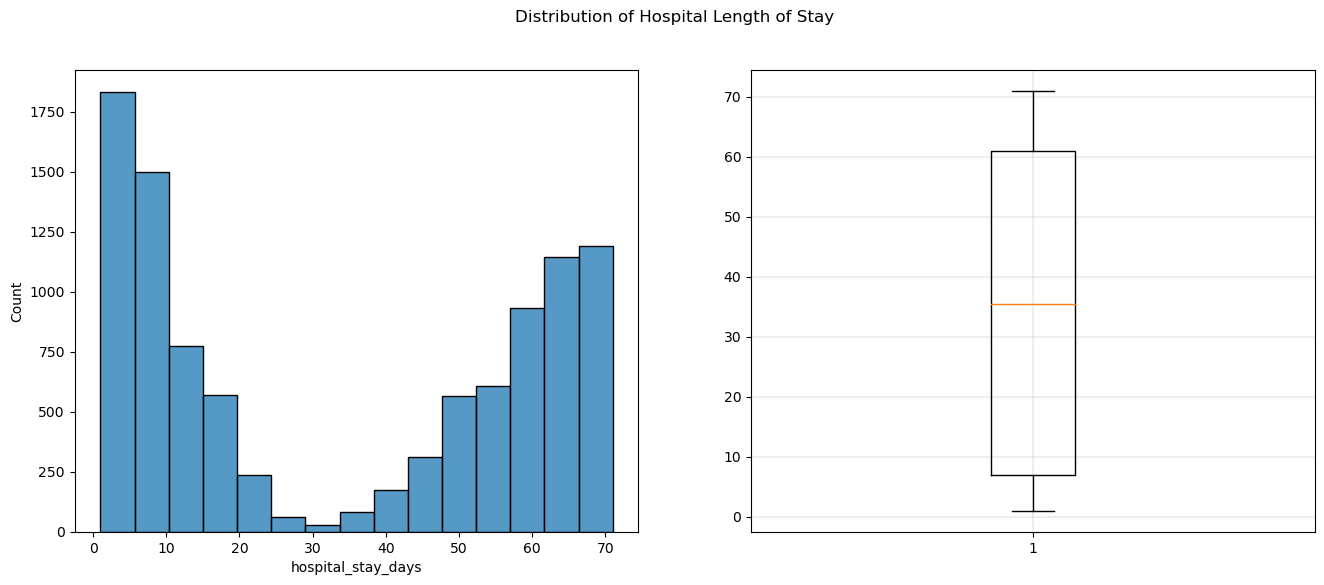

In [10]:
## target column
plt.figure(figsize=(16,6))
plt.subplot(1, 2, 1)
sns.histplot(df['hospital_stay_days'])

plt.subplot(1, 2, 2)
plt.boxplot(df['hospital_stay_days'])
    
plt.grid(linewidth=0.3)
plt.suptitle('Distribution of Hospital Length of Stay')
plt.show()

***Continuous Variables***

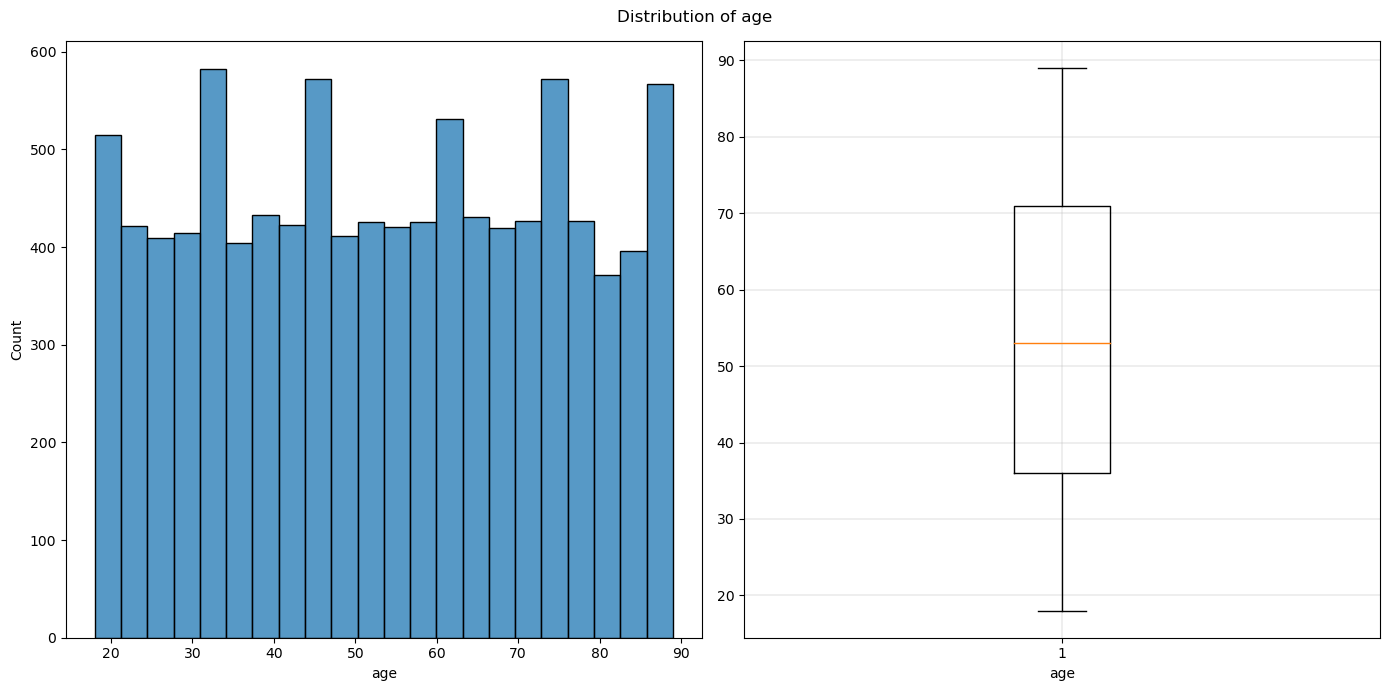

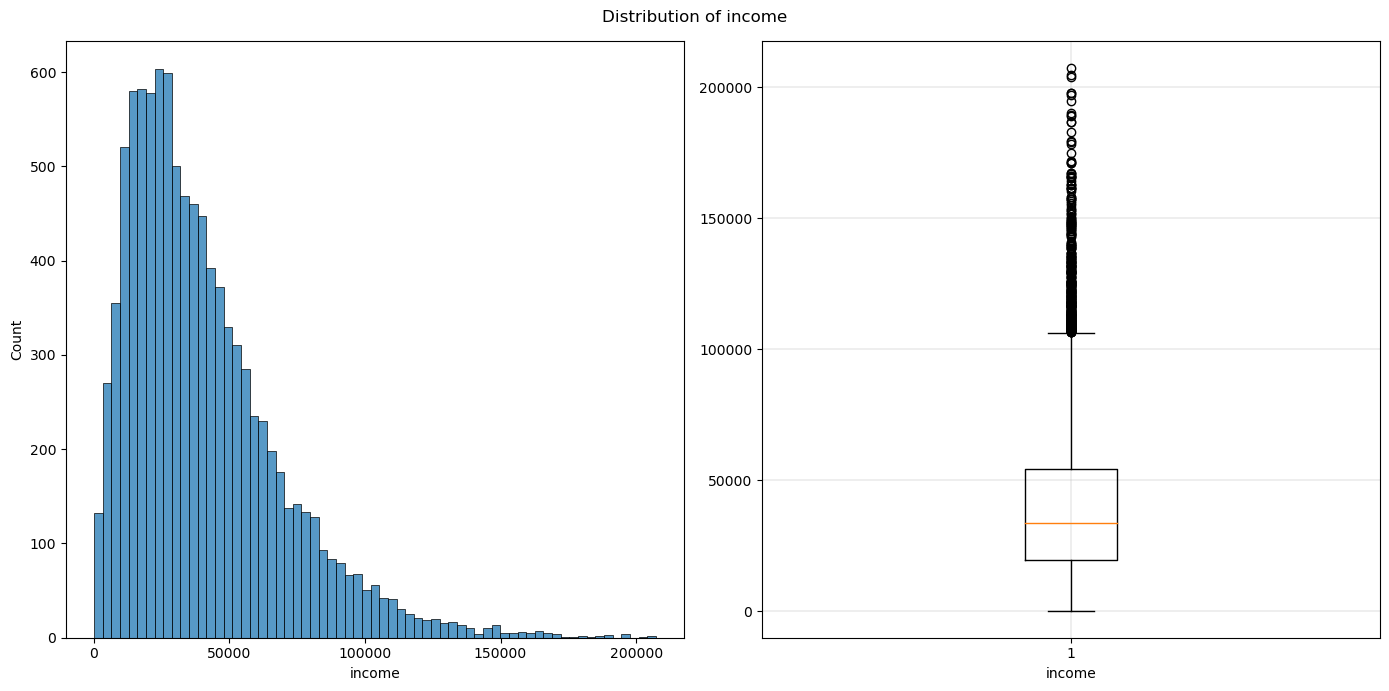

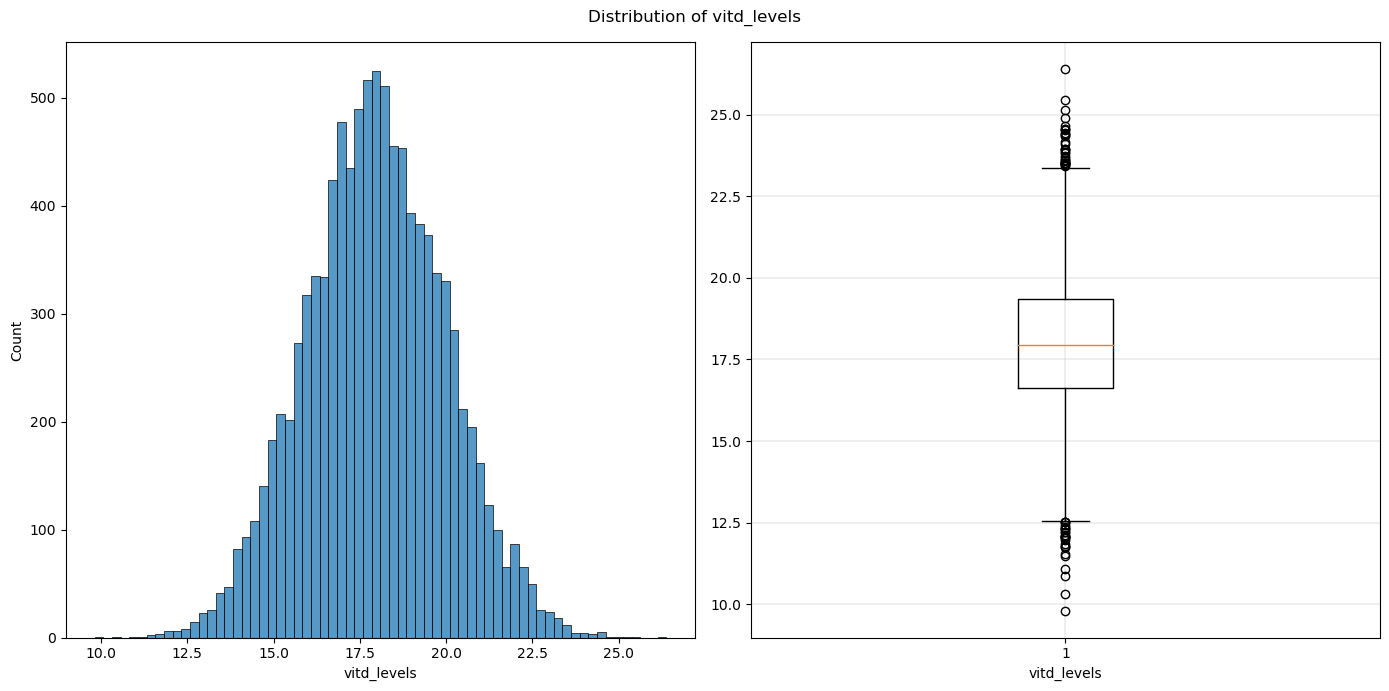

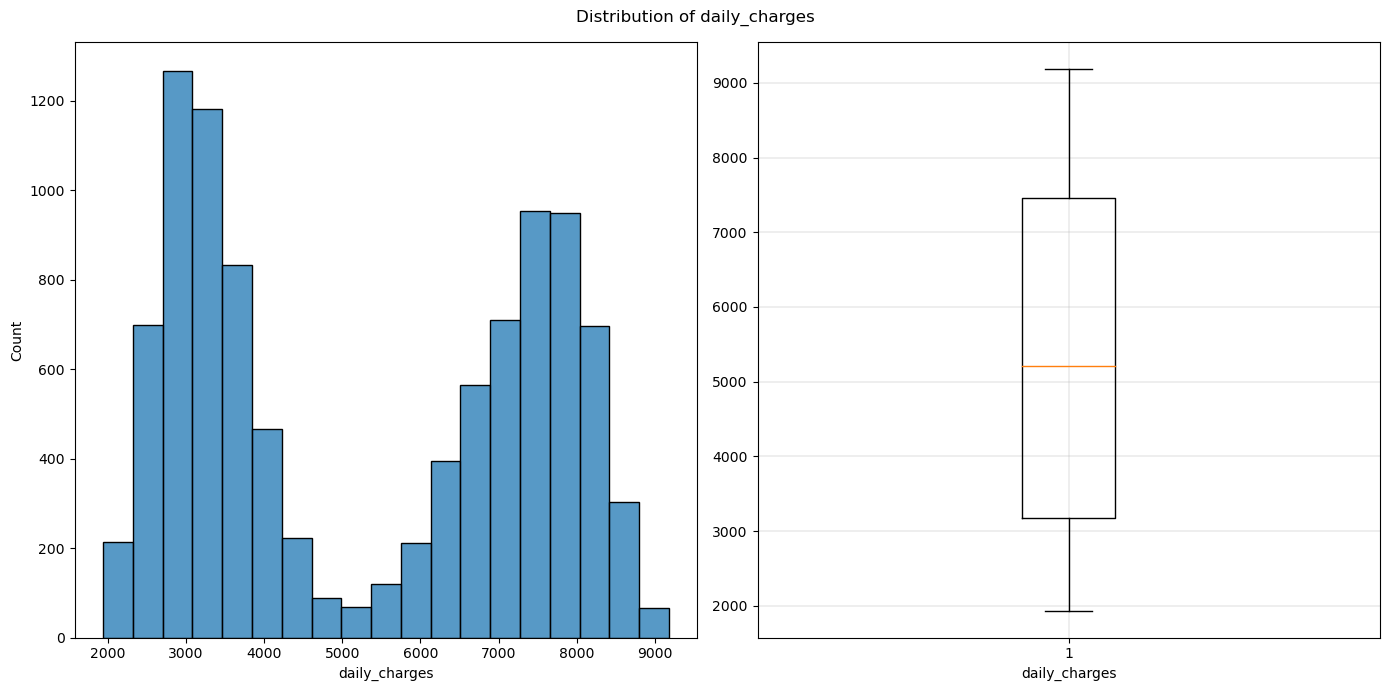

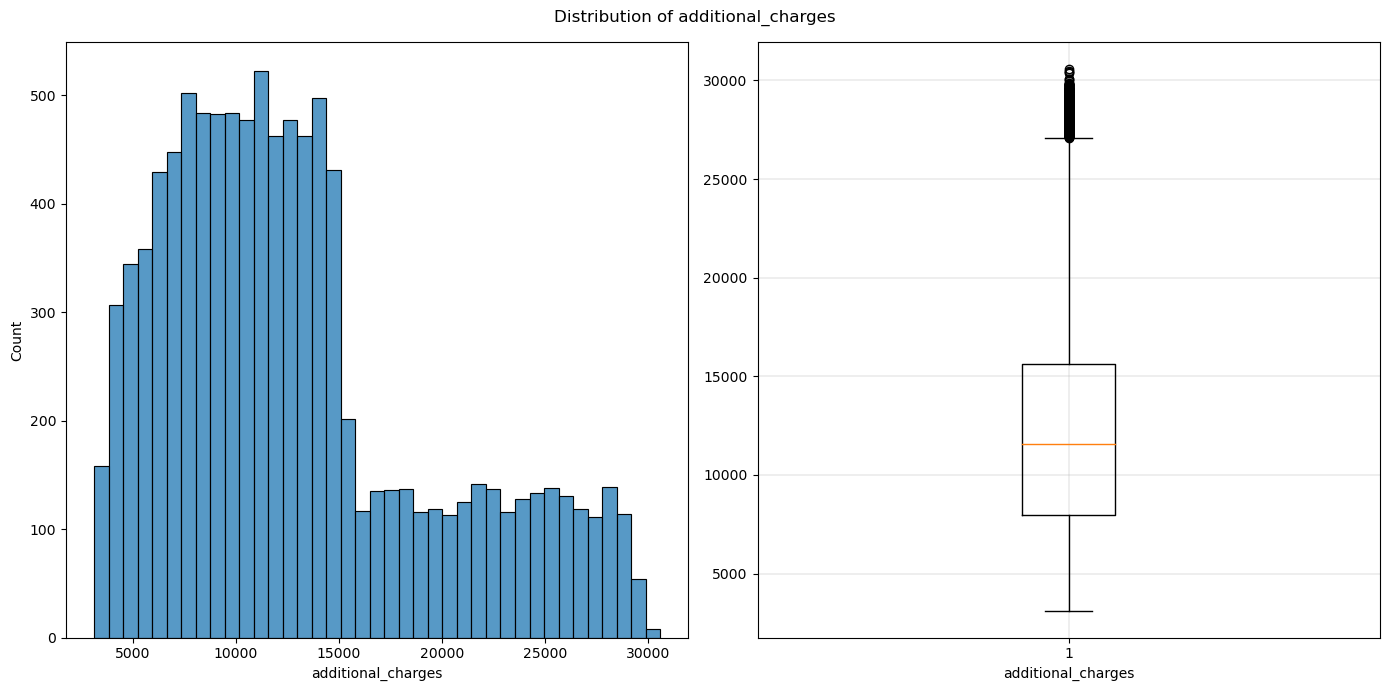

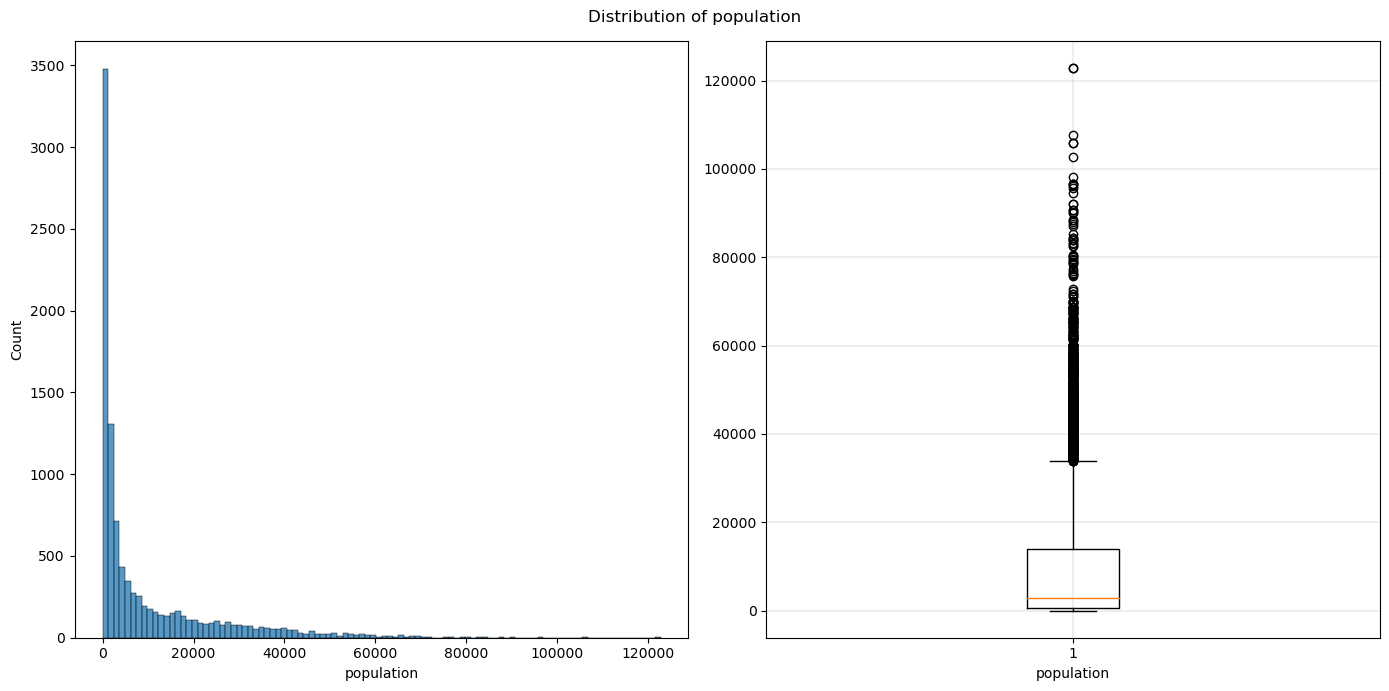

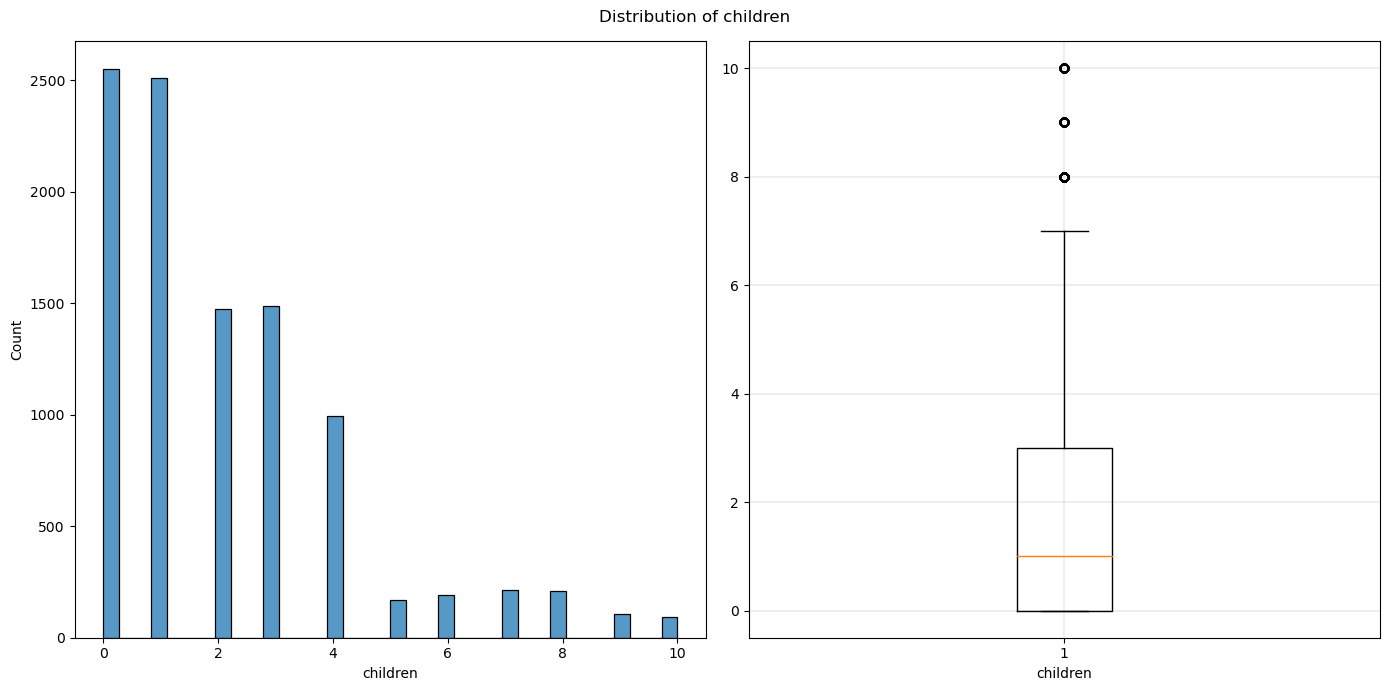

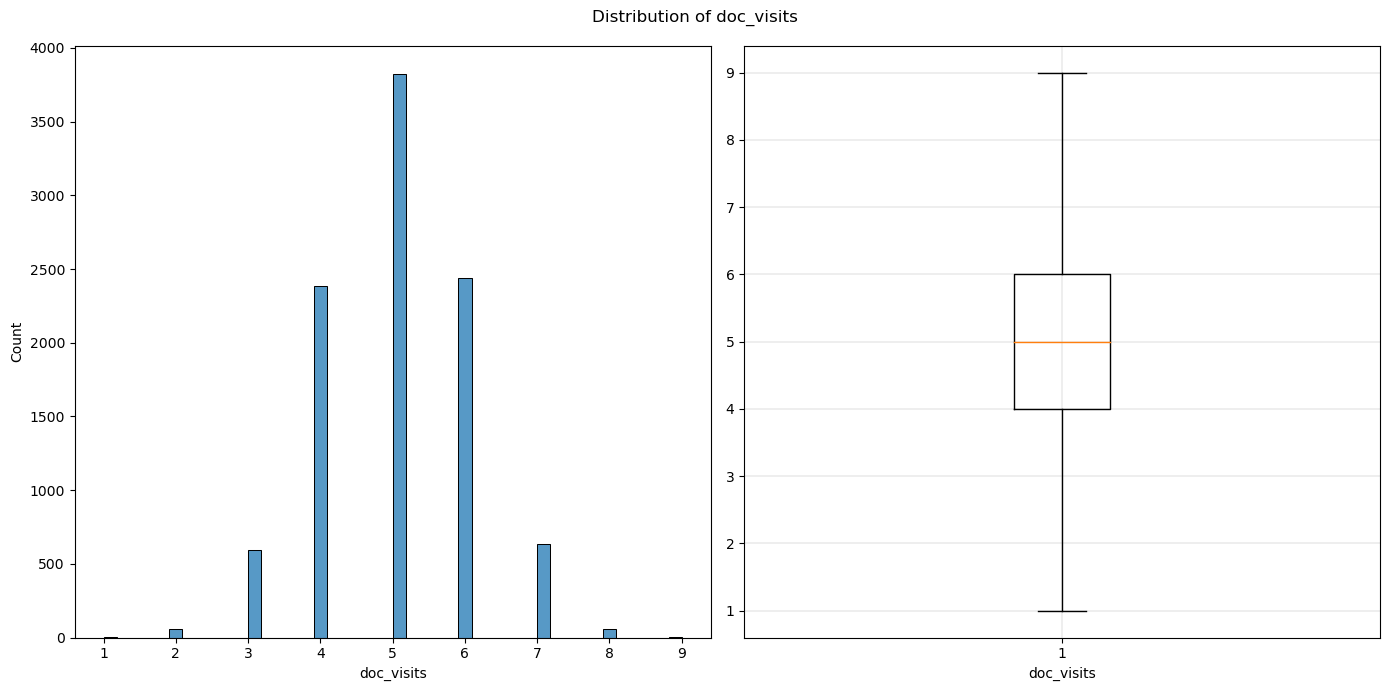

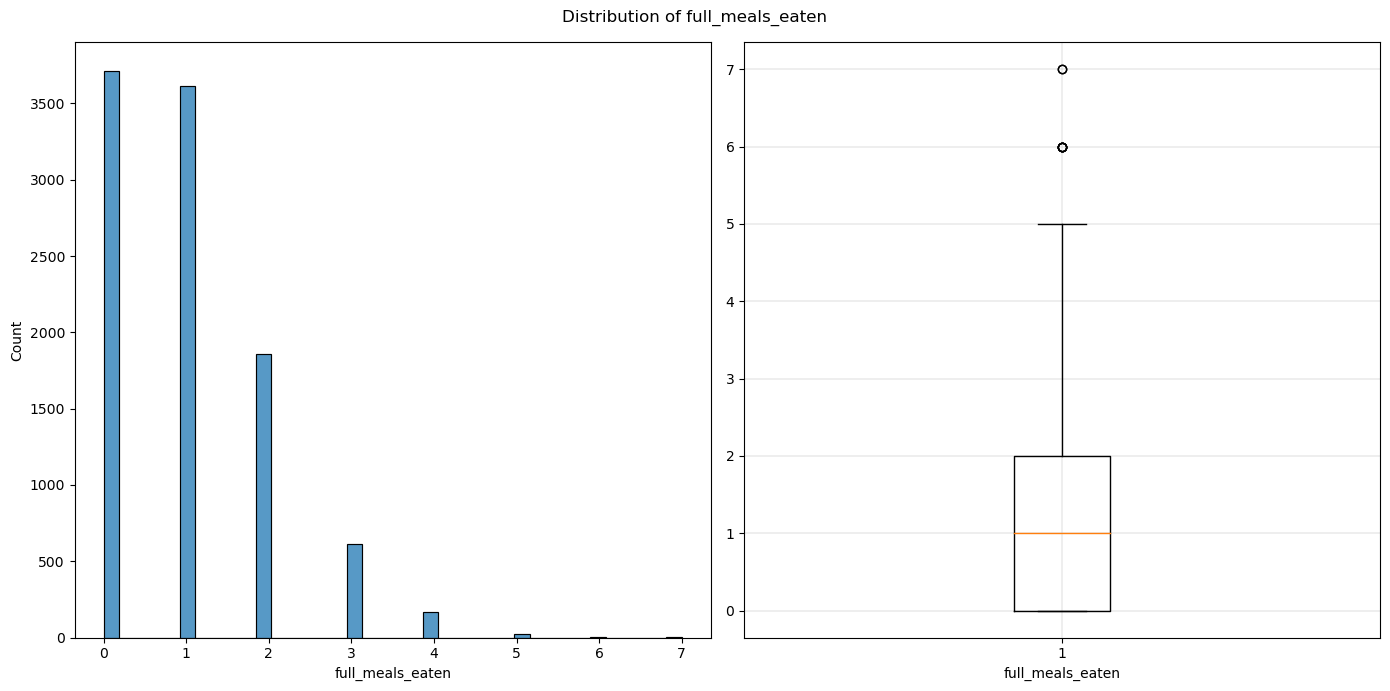

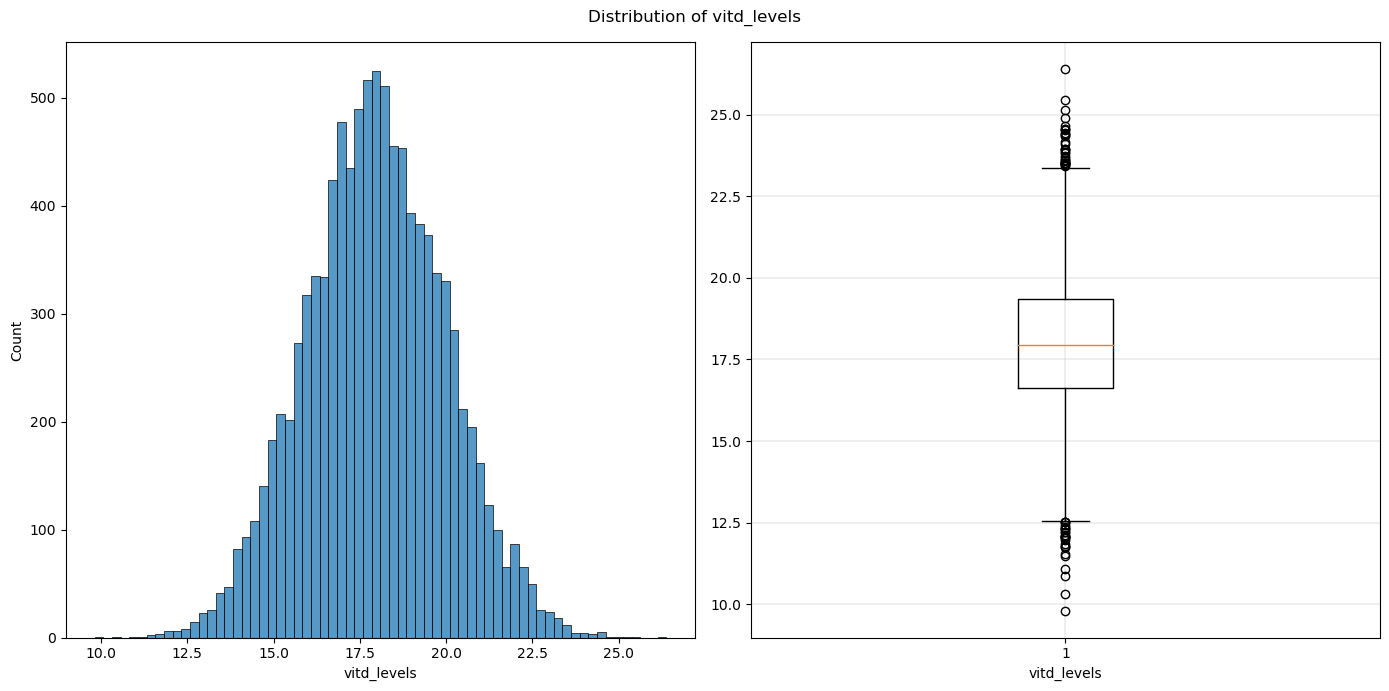

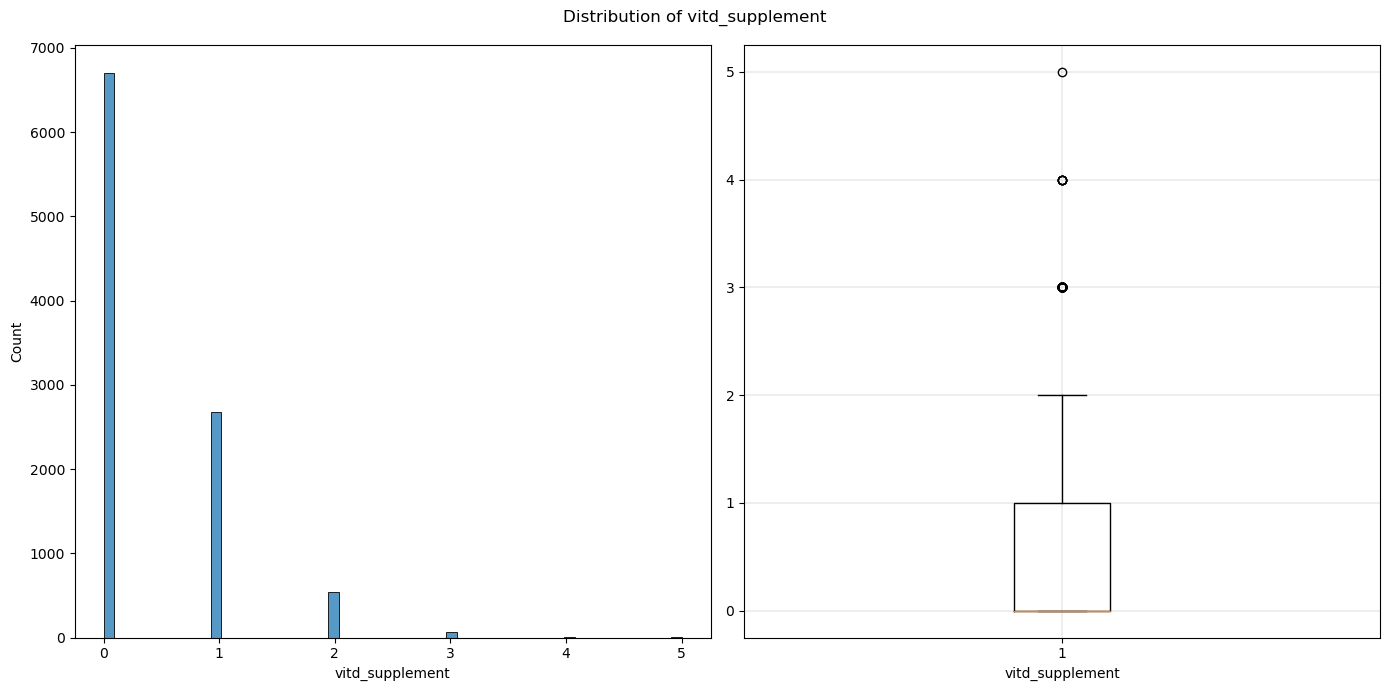

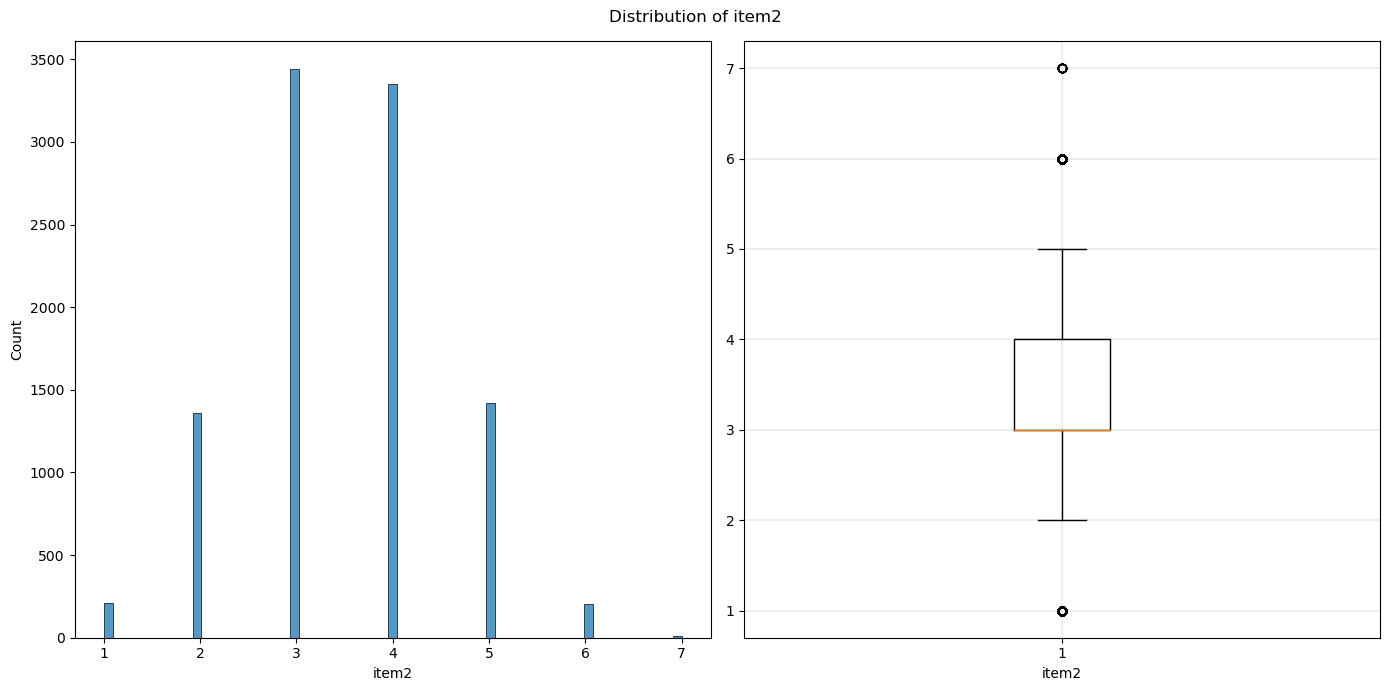

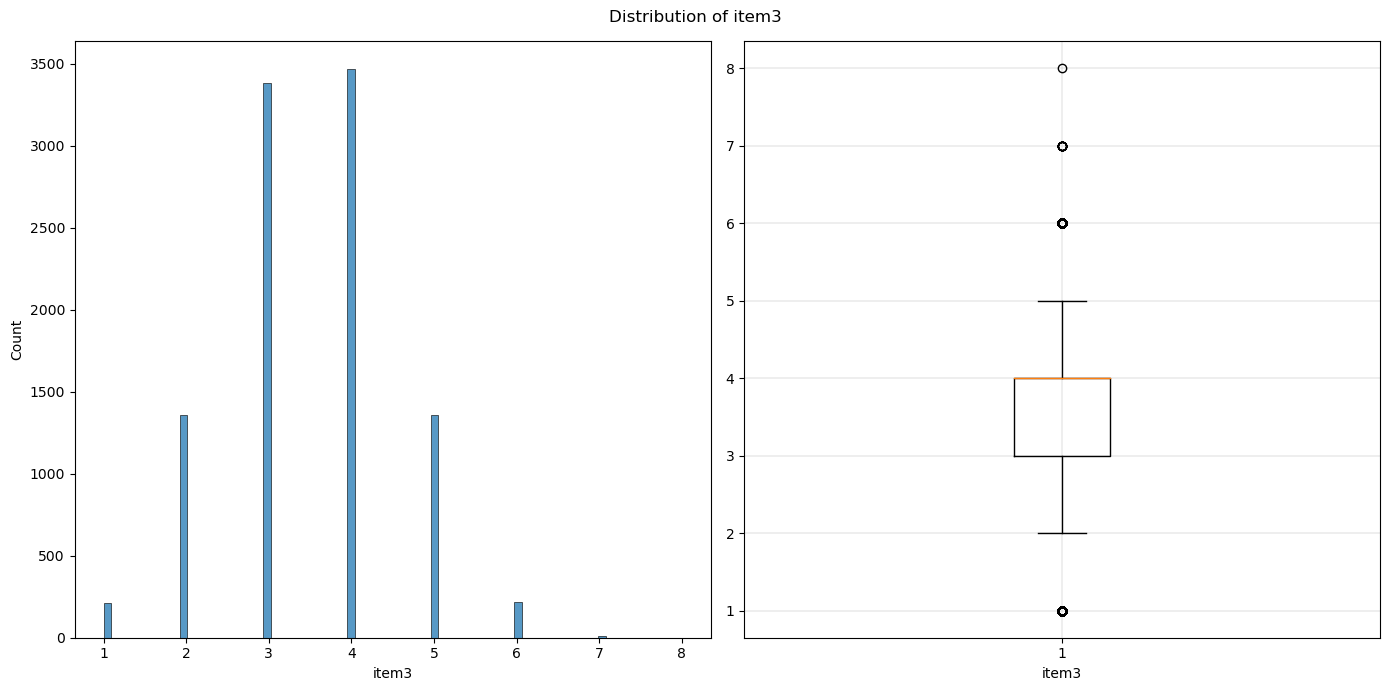

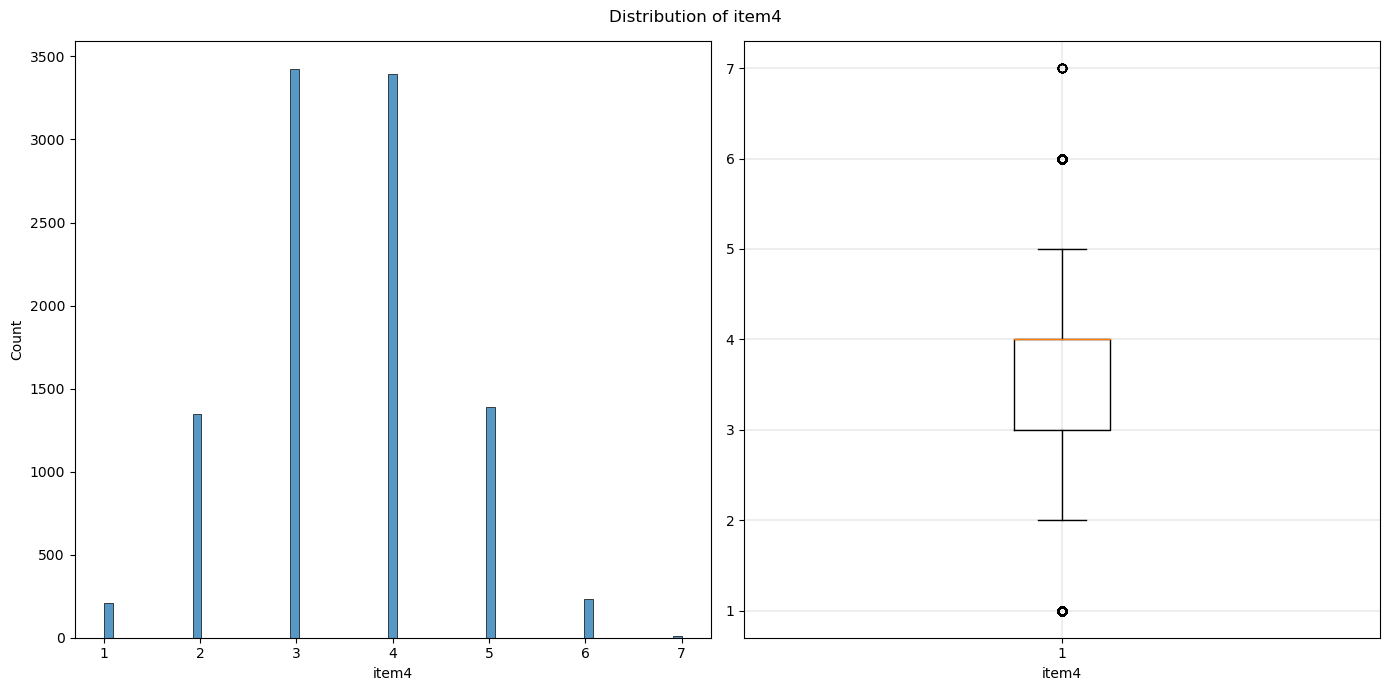

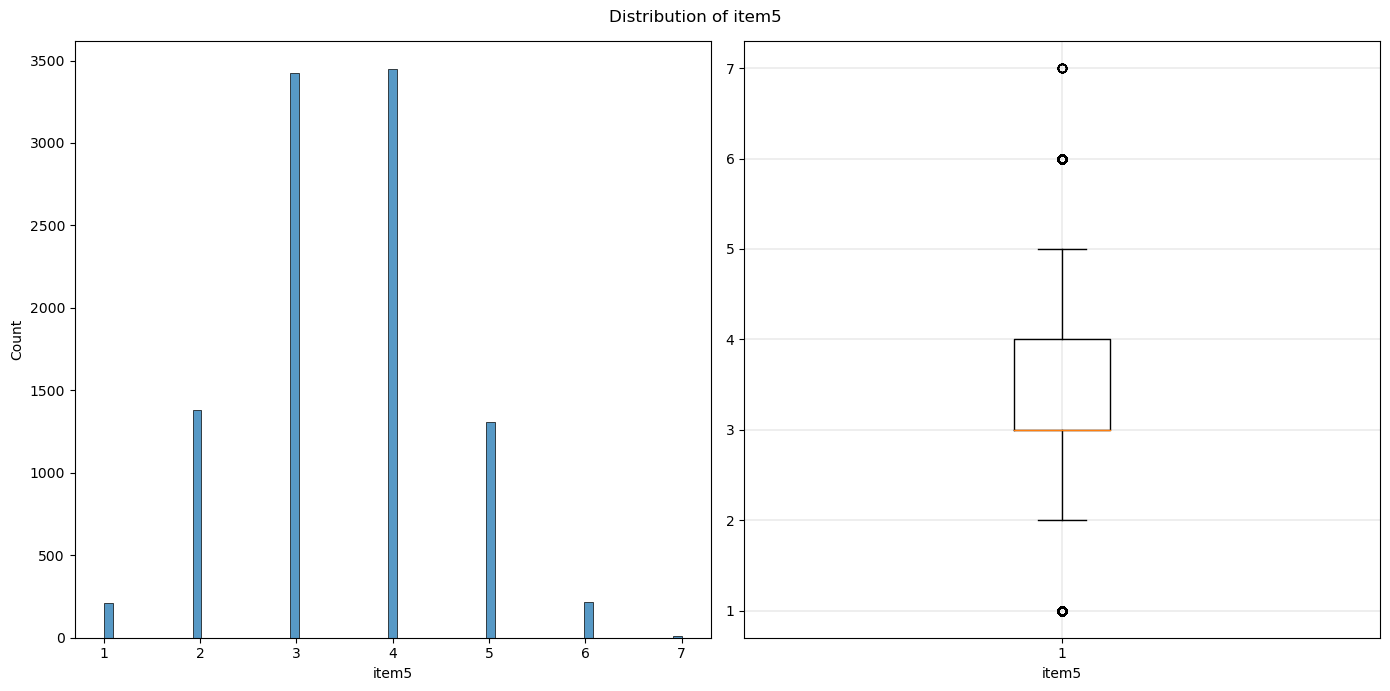

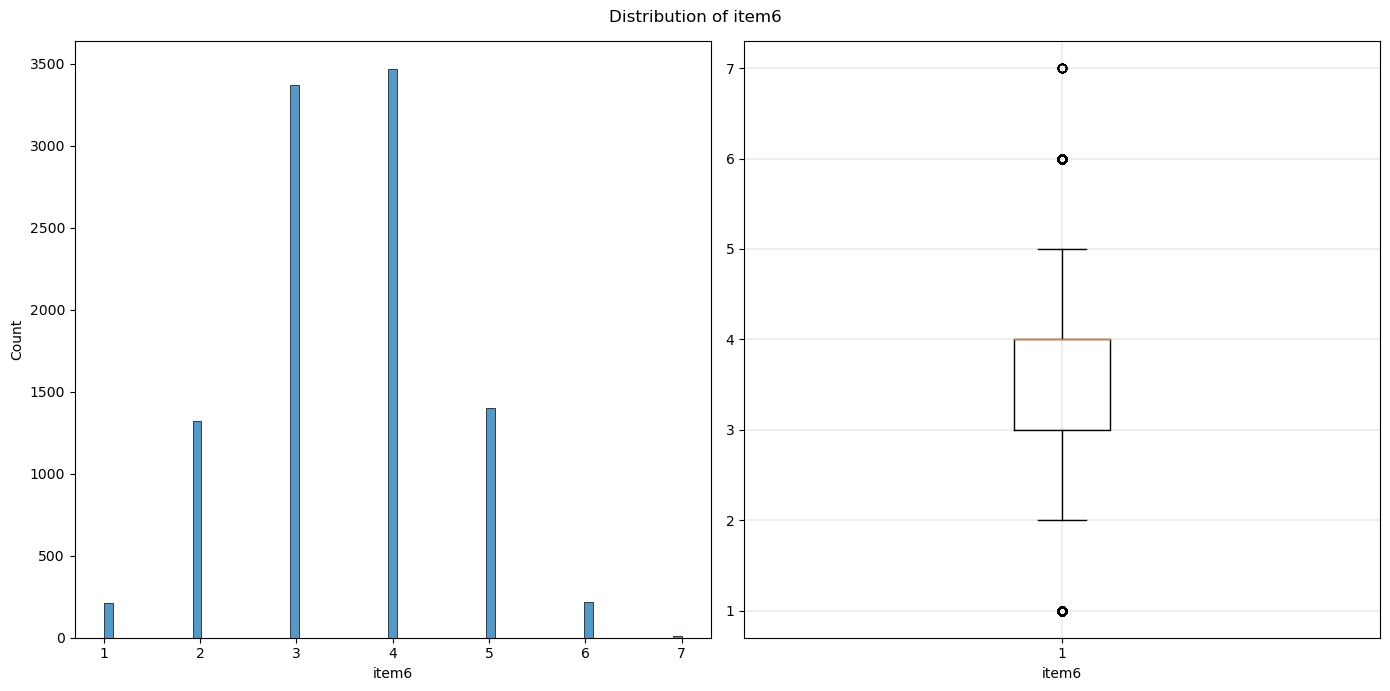

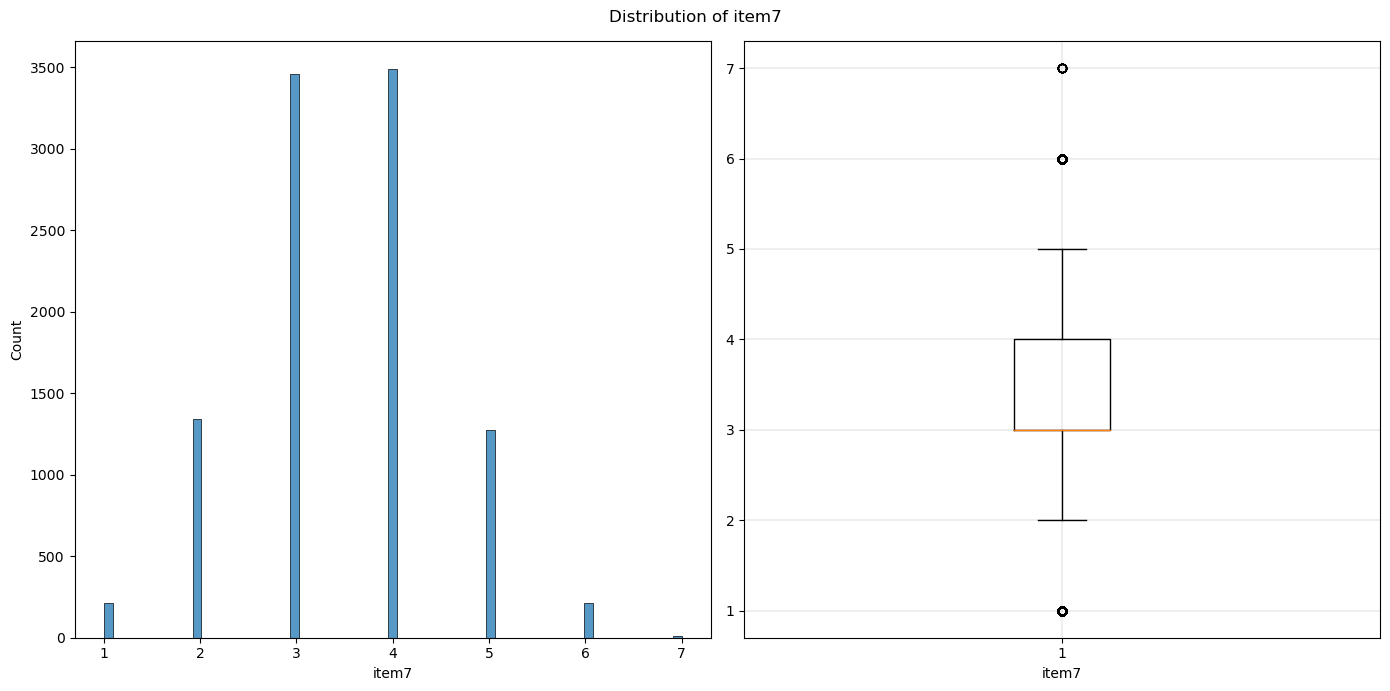

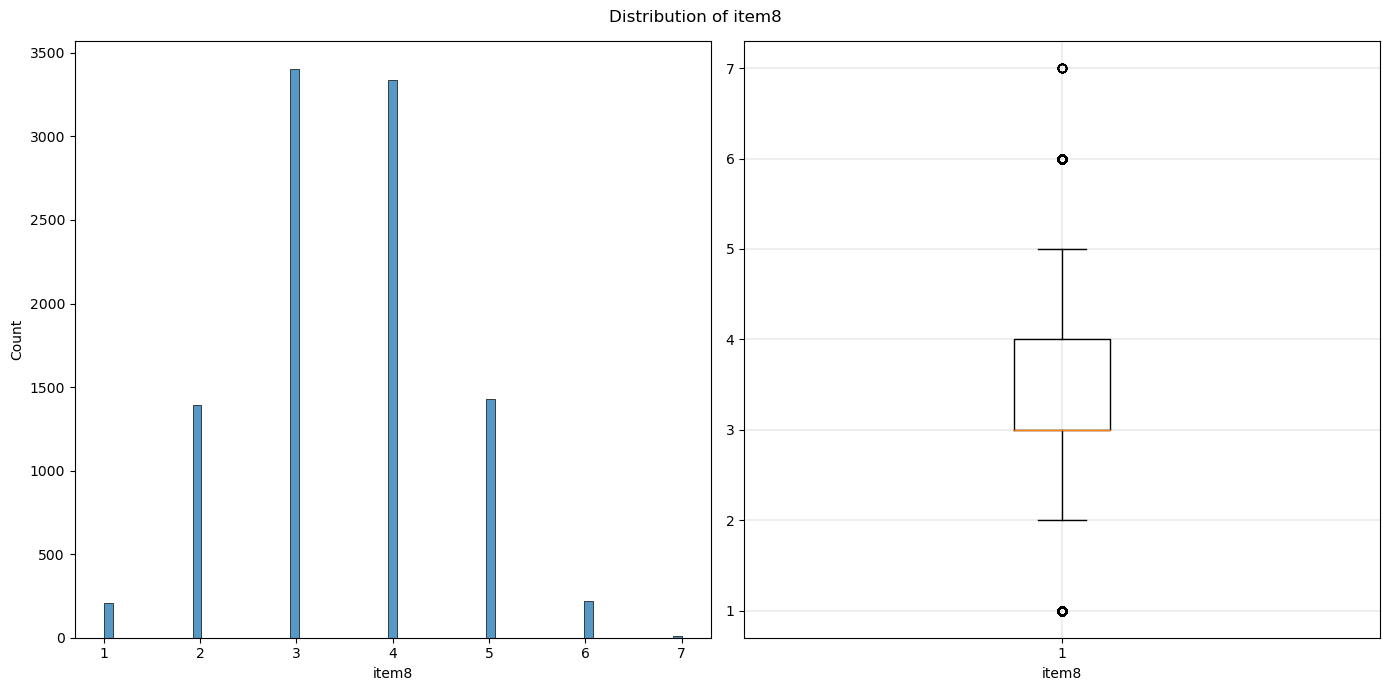

In [11]:
# distribution plot along with boxplot
for col in cont_vars:
    plt.figure(figsize=(14, 7))
    
    # hist
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=col)
    
    plt.xlabel(col)
    
    # boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(df[col])
    plt.xlabel(col)
     
    plt.grid(linewidth=0.3)    
    plt.suptitle(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

***Categorical Variables***

Distribution for categorical variables:


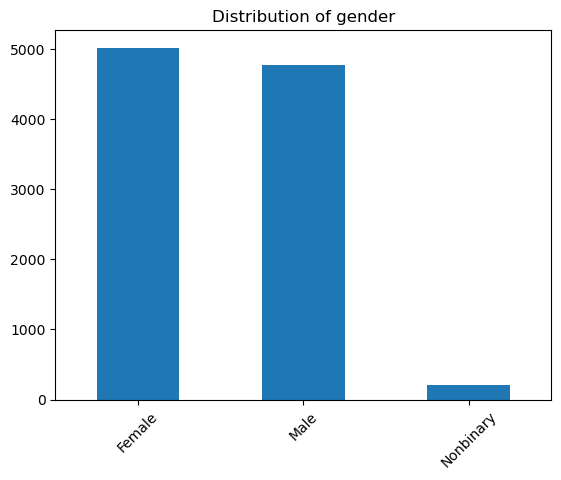

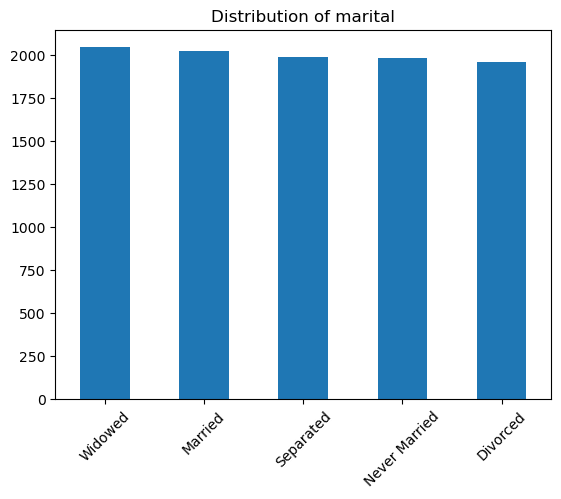

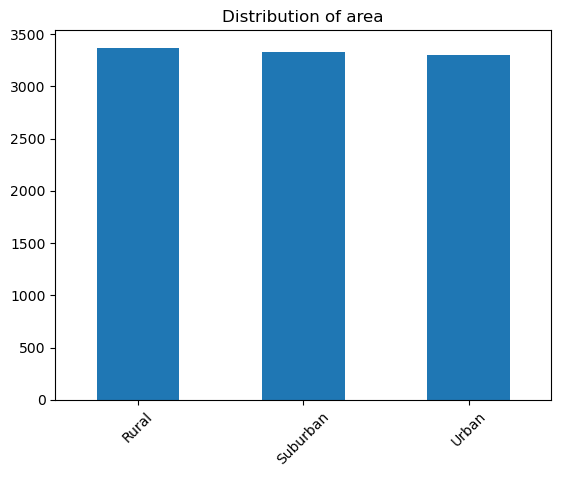

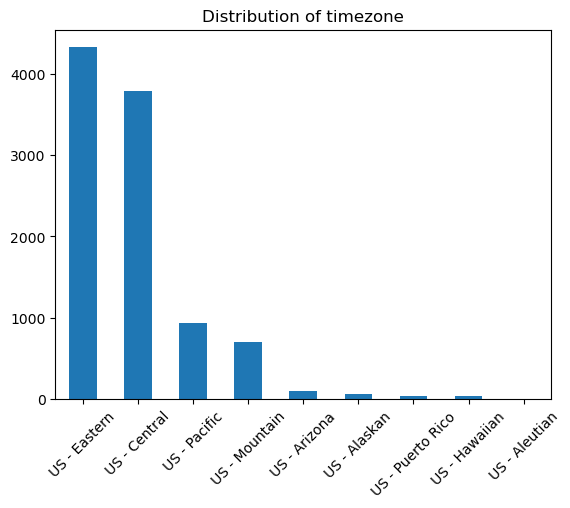

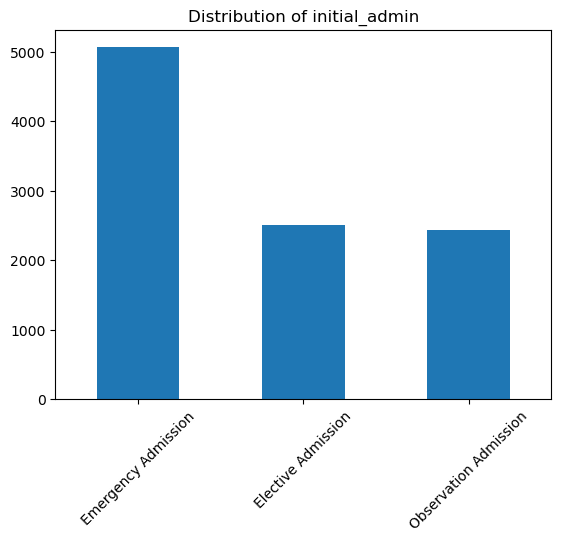

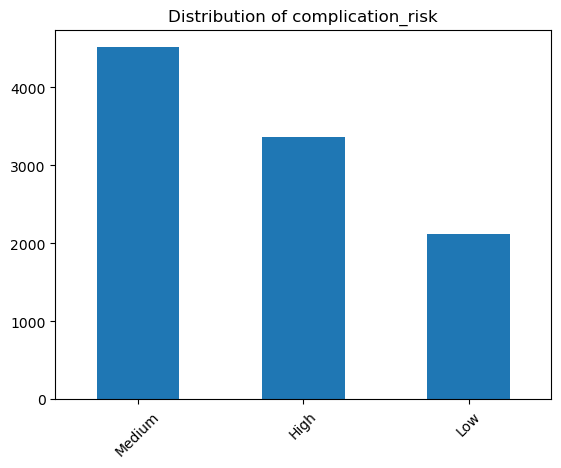

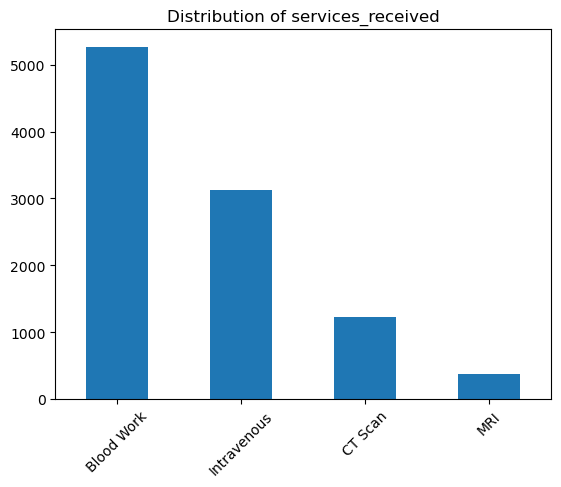

In [12]:
# distribution of categorical variables
print('Distribution for categorical variables:')
for var in cat_vars:
    df[var].value_counts().plot(kind='bar') 
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {var}')
    plt.show()

***Indicator (boolean) Variables***

Frequency distribution for boolean variables:


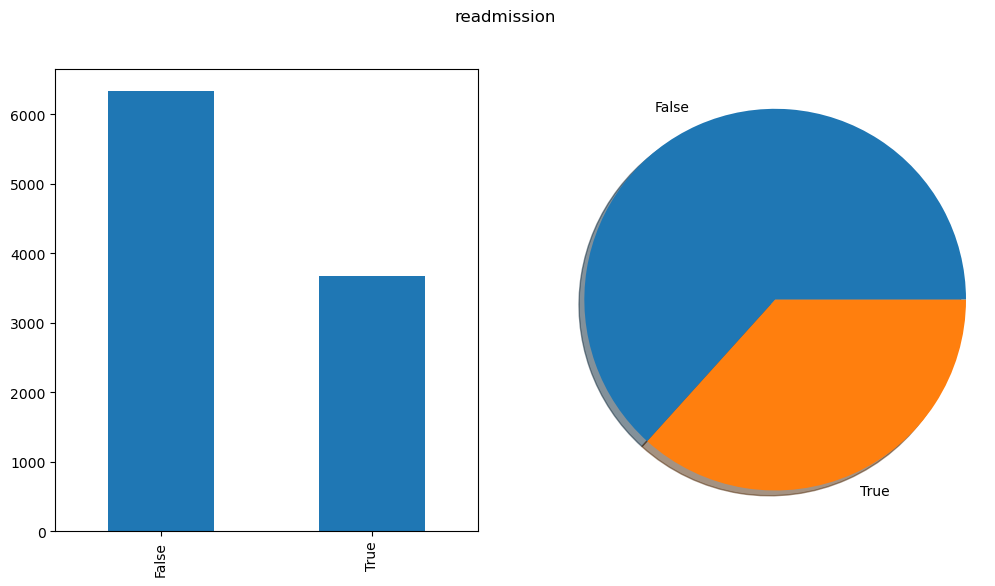

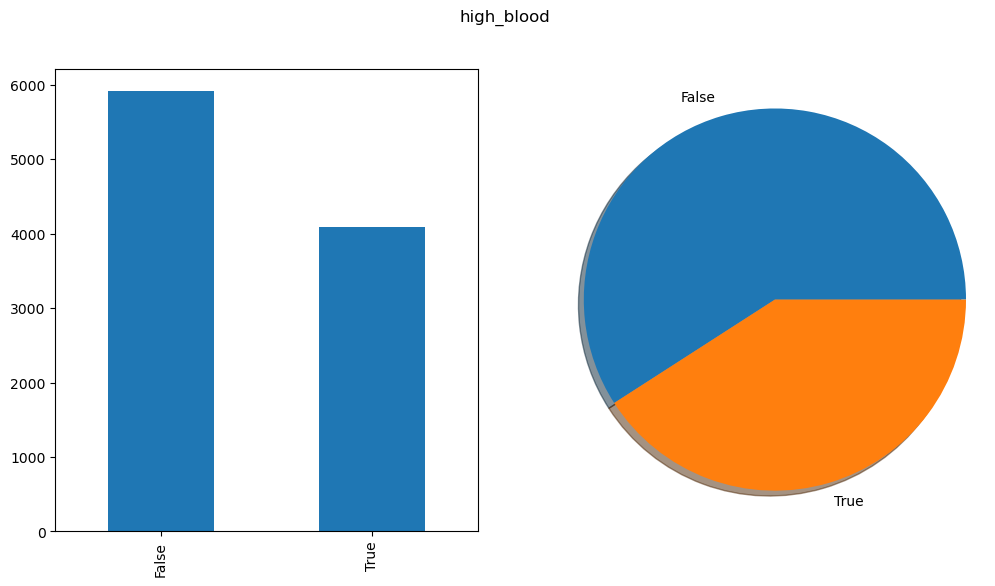

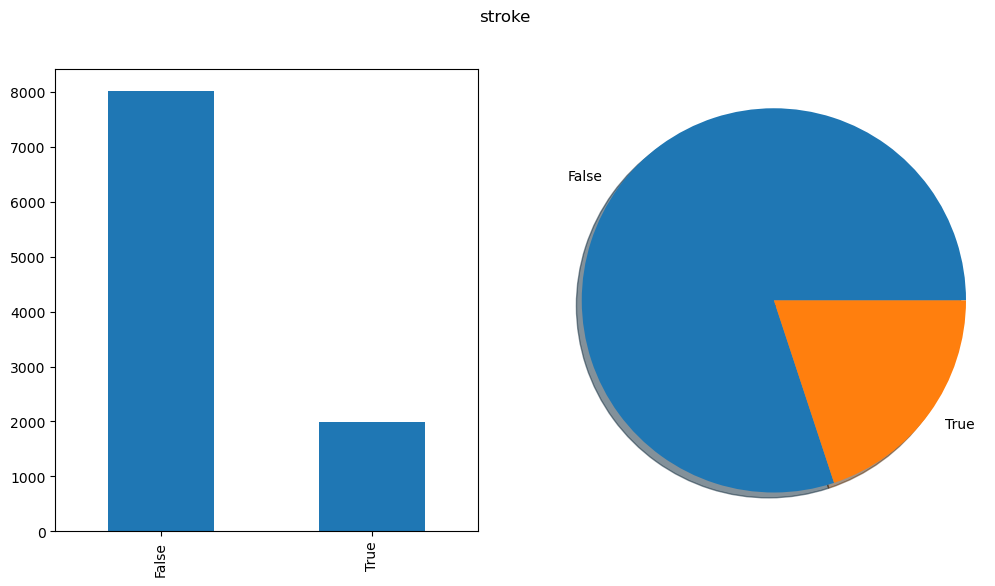

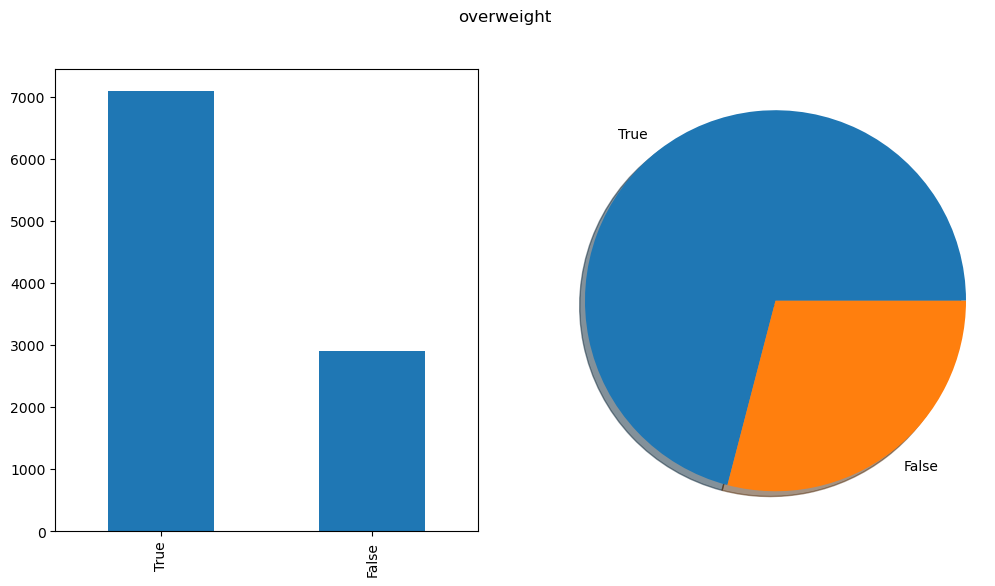

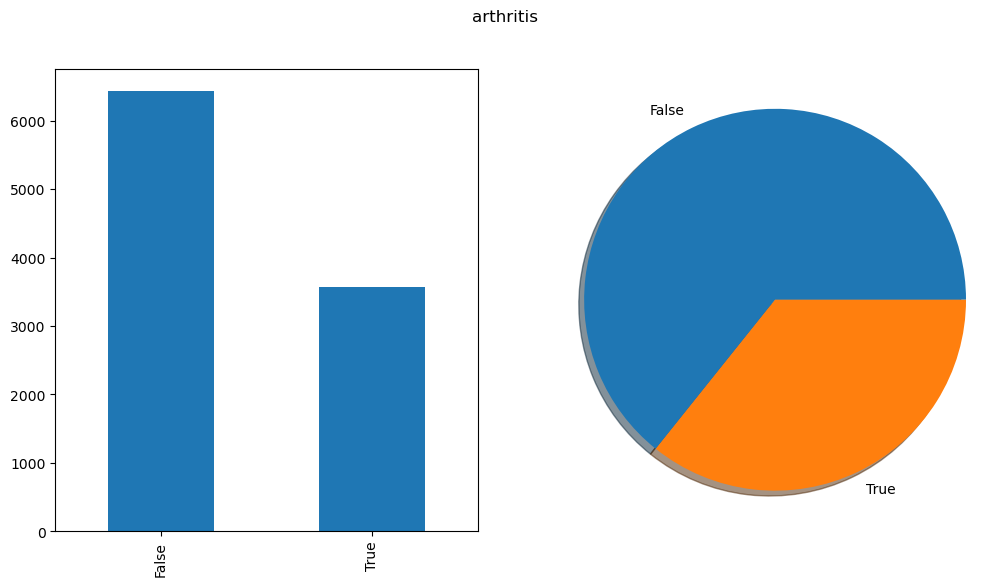

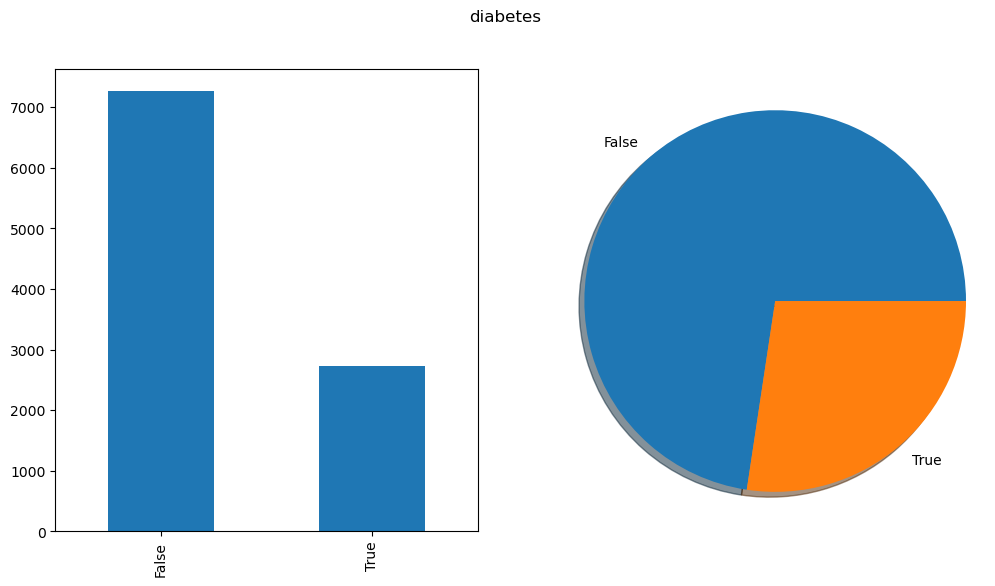

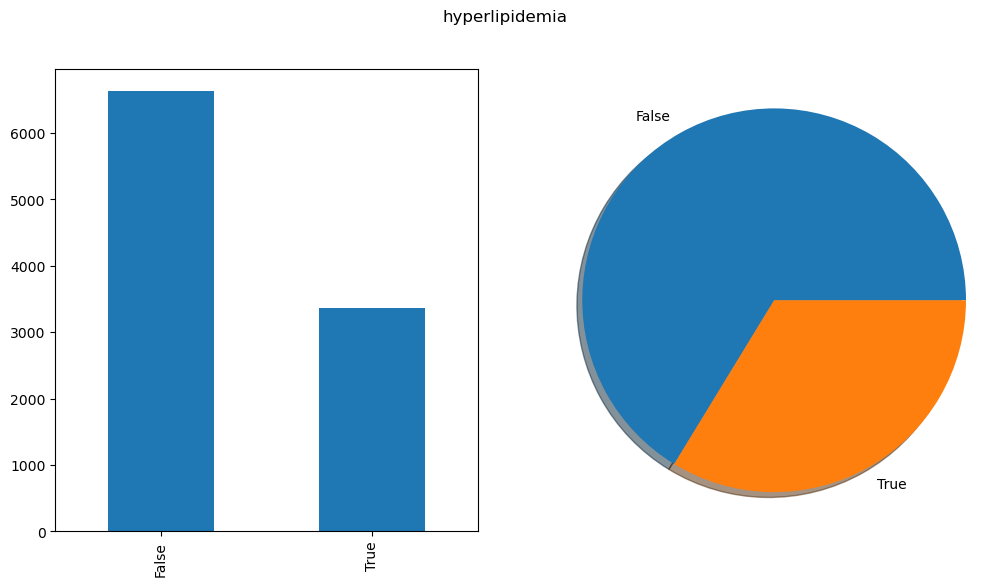

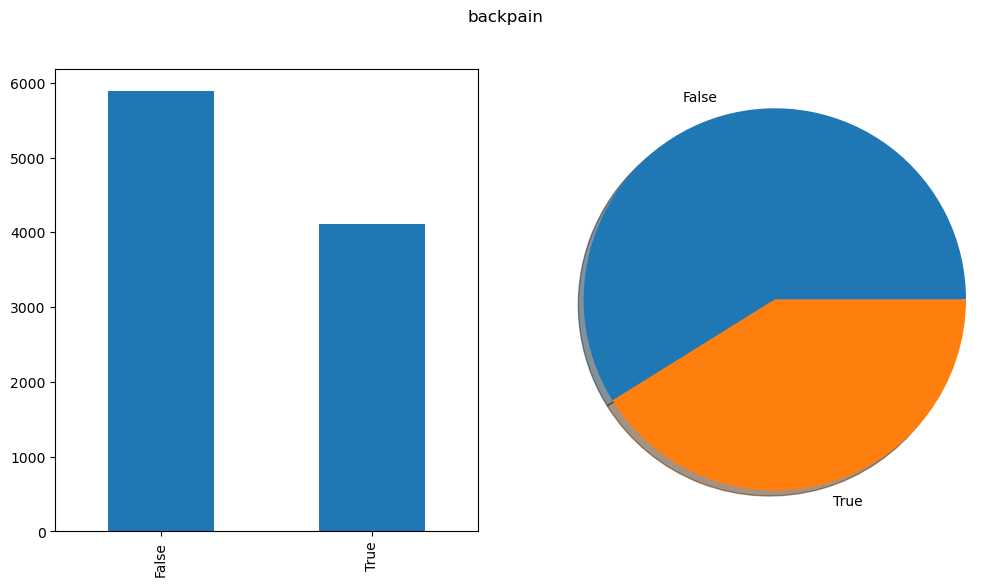

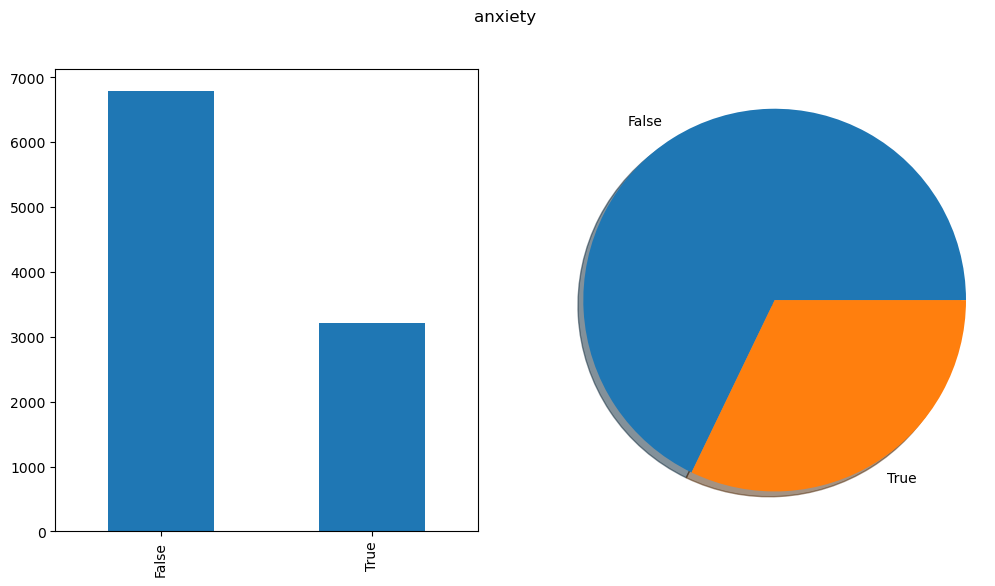

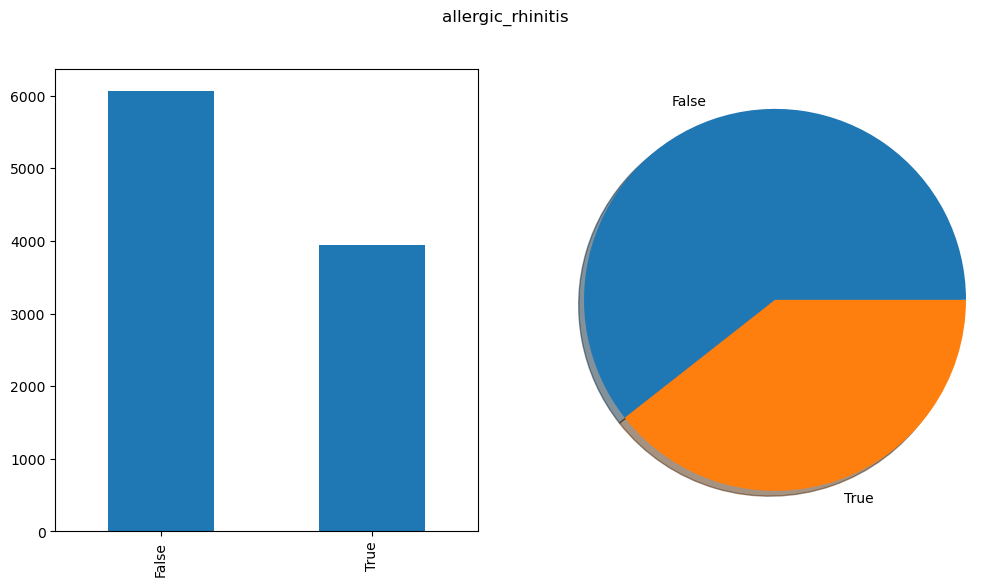

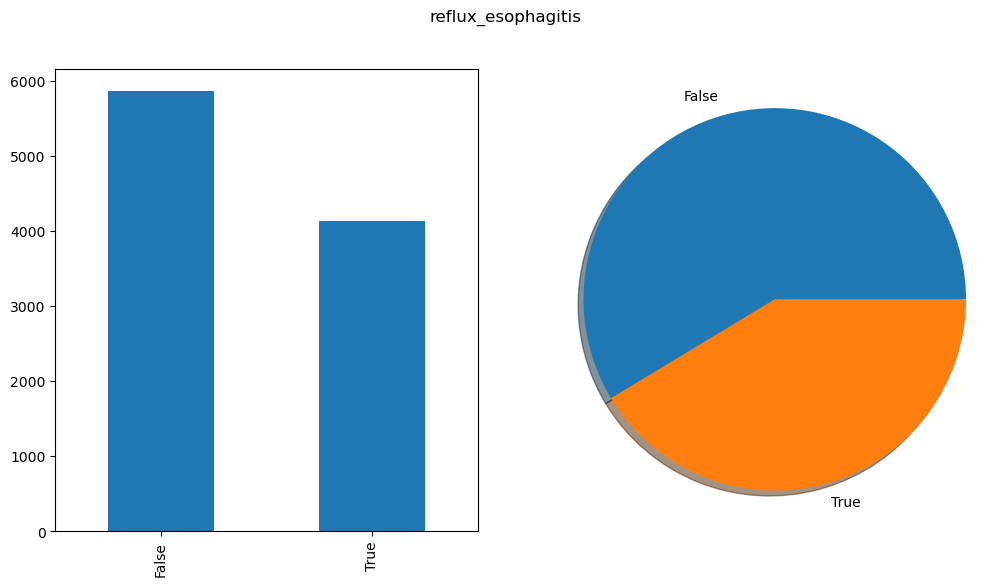

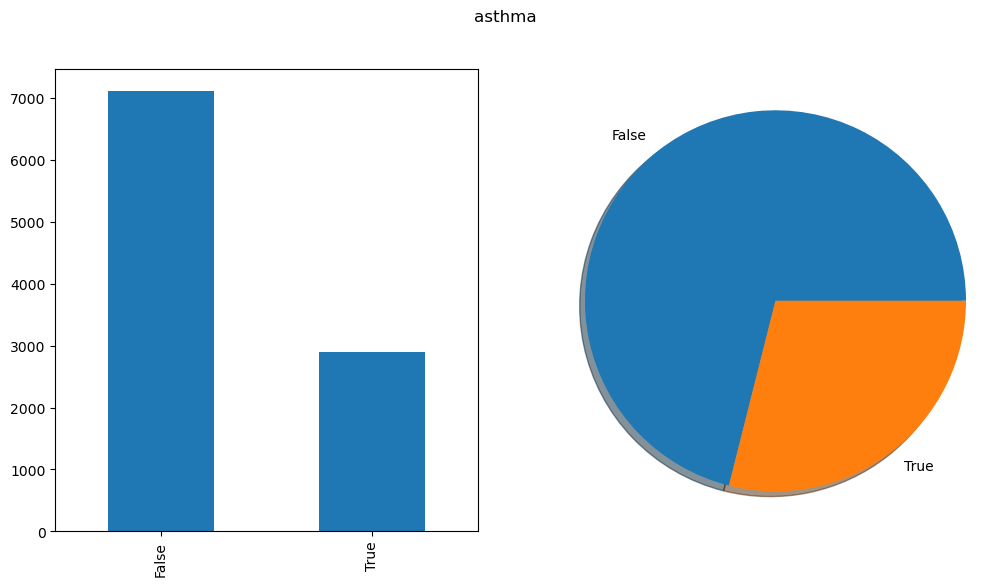

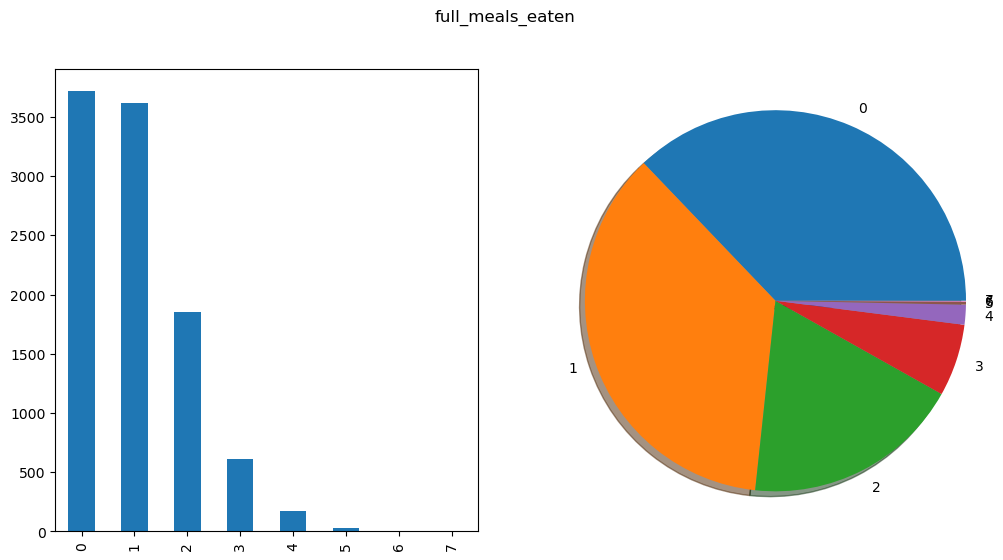

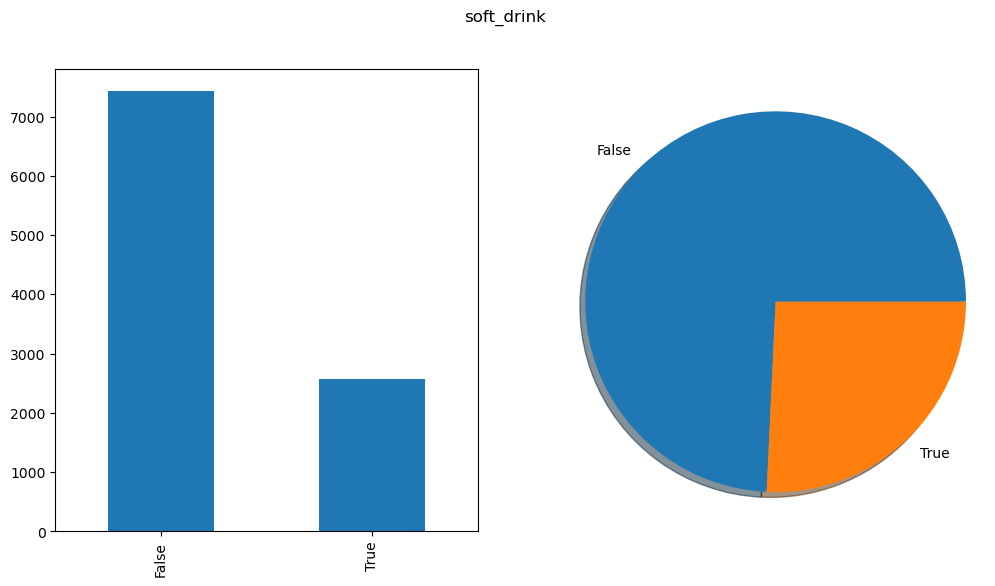

In [13]:
# Frequency distribution for boolean variables
print('Frequency distribution for boolean variables:')
for col in boolean_vars:
    plt.figure(figsize=(12,6))
#     print(f'\n{col}:')
    plt.subplot(1, 2, 1)
    df[col].value_counts().plot(kind='bar')
    
    plt.subplot(1, 2, 2)
    val_counts_dict = dict(df[col].value_counts())
    
    v = list(val_counts_dict.values())
    k = list(val_counts_dict.keys())
    plt.pie(v, labels = k, shadow=True)
    plt.axis('equal')
    plt.suptitle(col)
    plt.show()

#### Bivariate Visualizations 
- Independent variables versus target variable

***Continuous v. Continuous (target)***

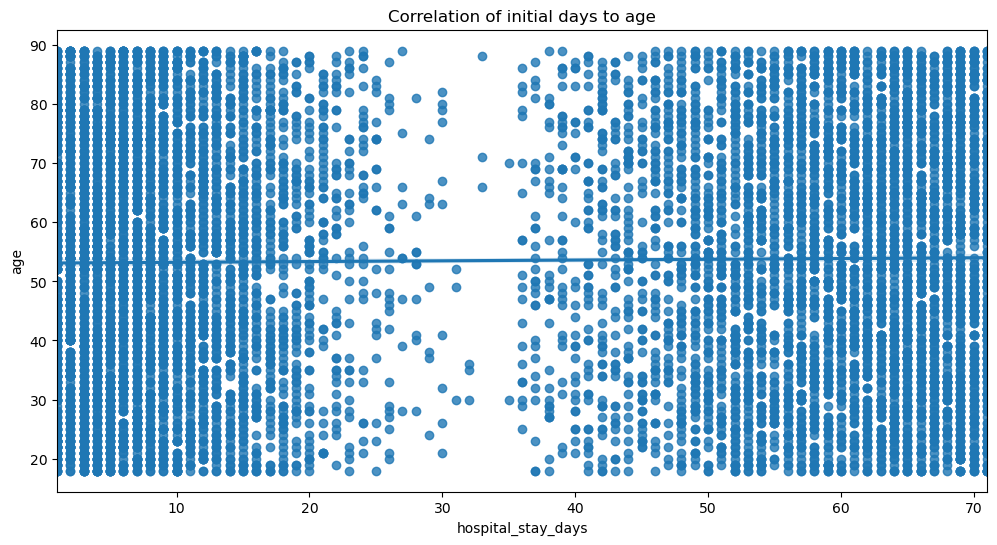

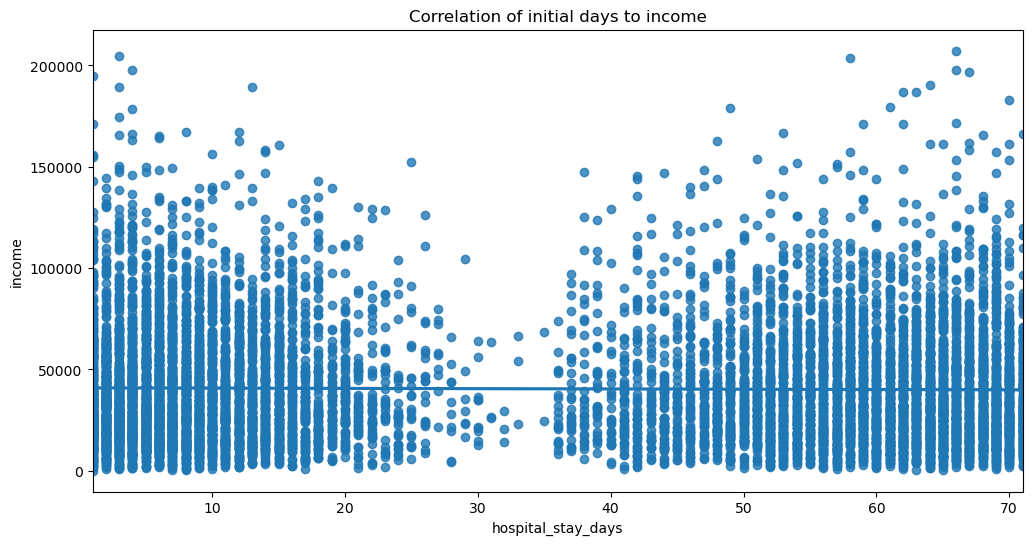

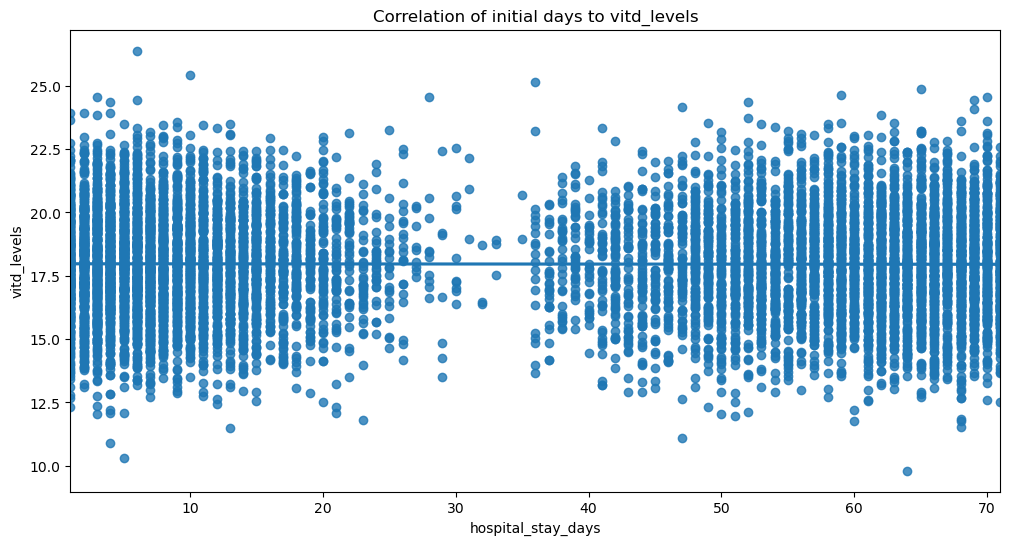

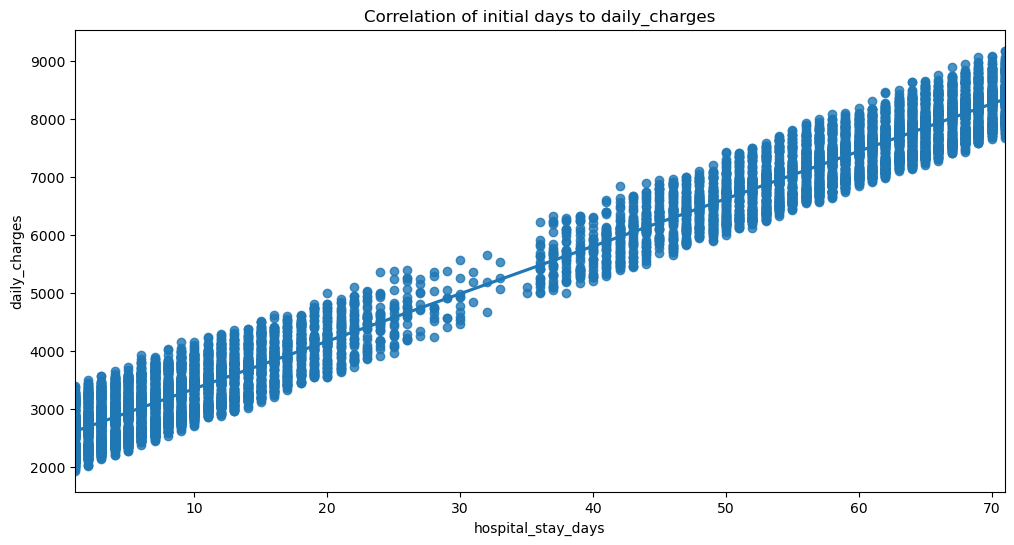

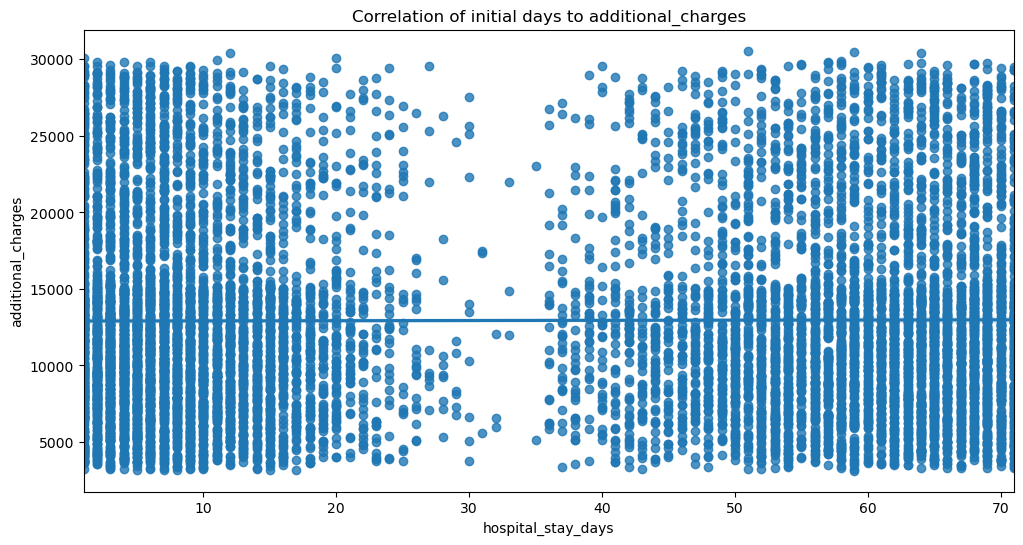

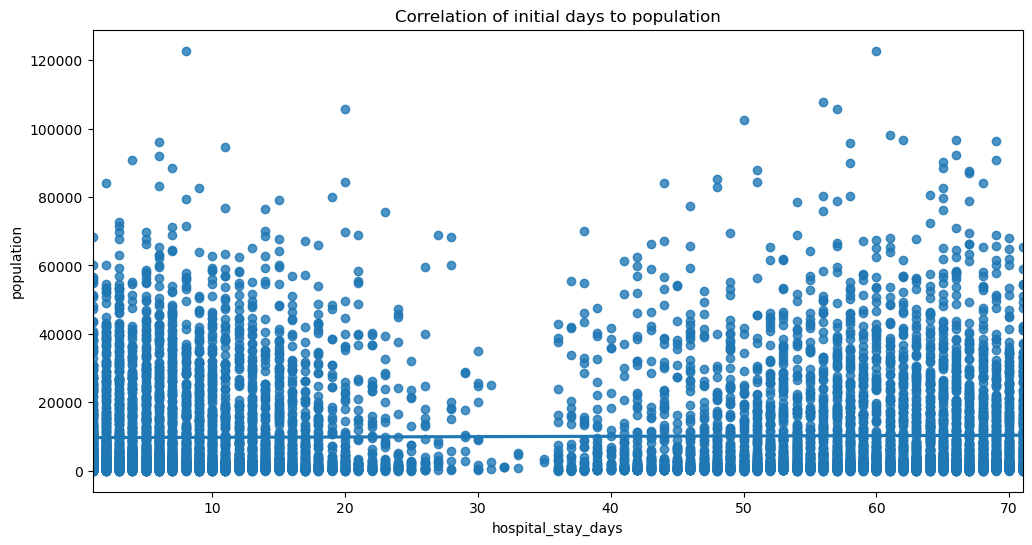

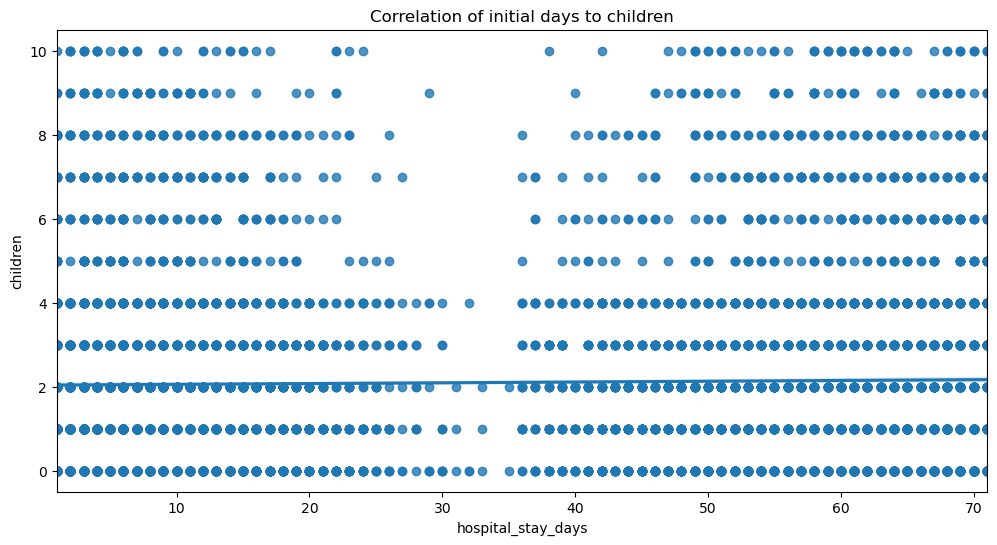

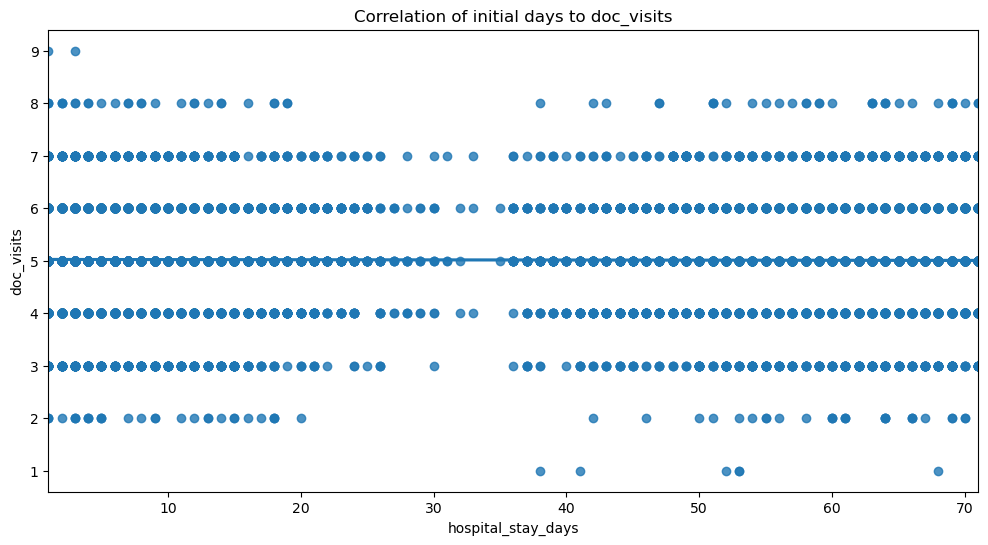

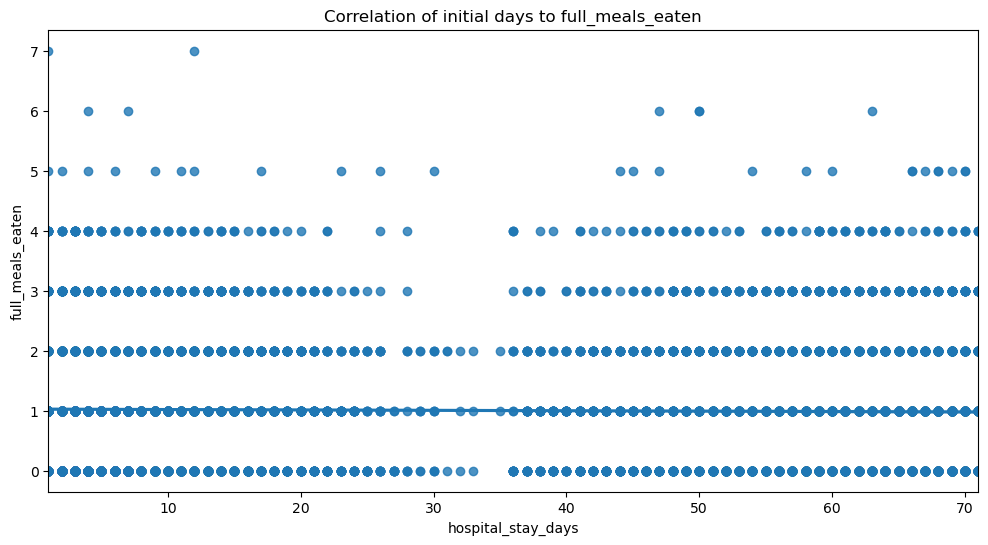

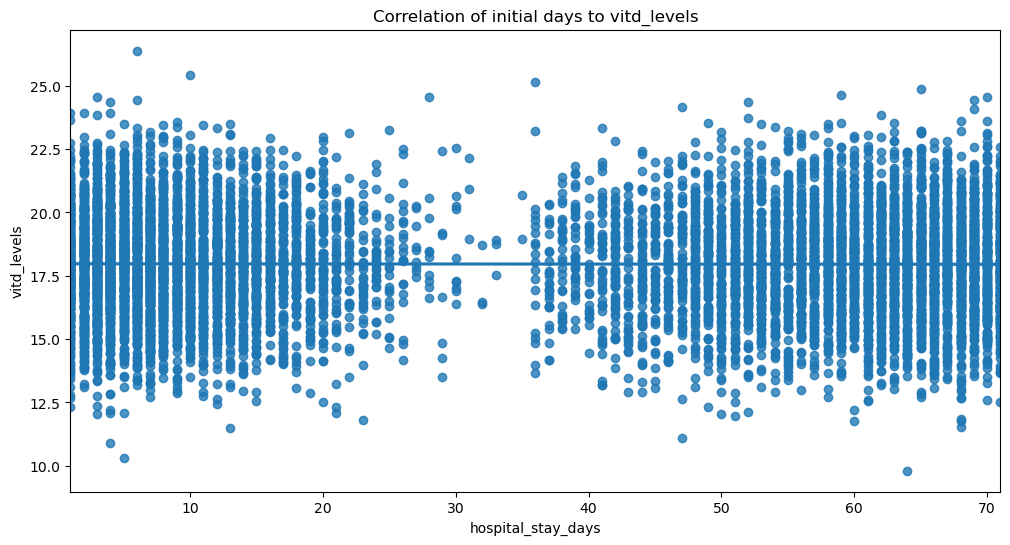

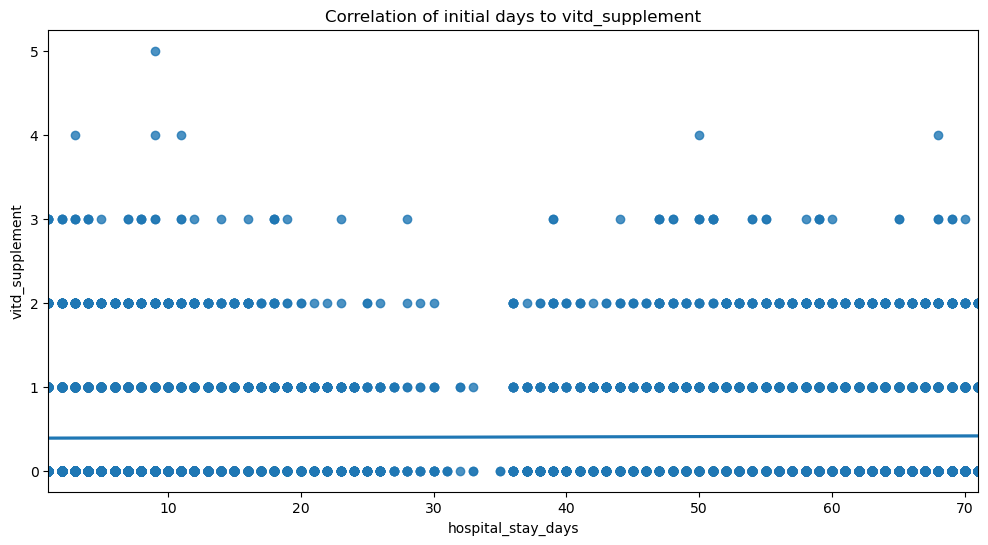

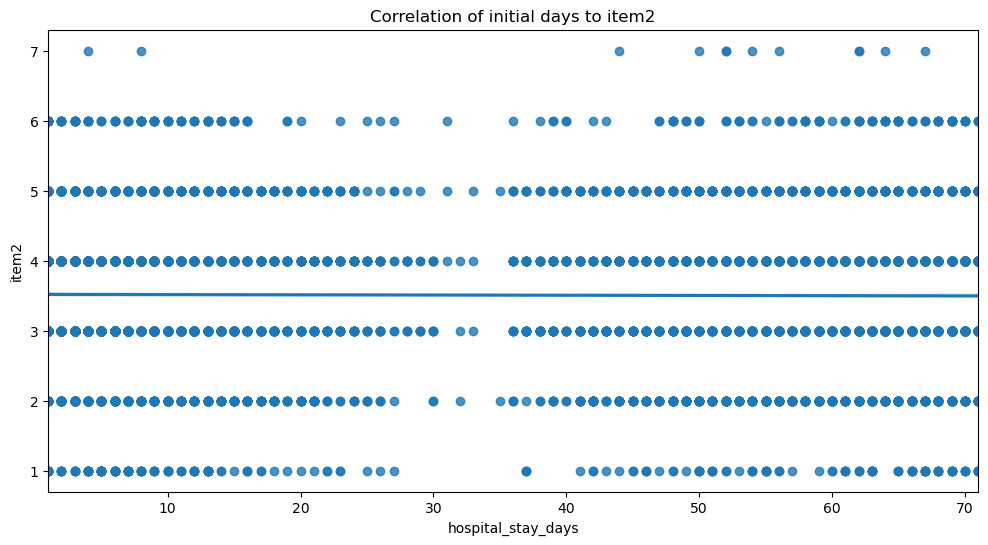

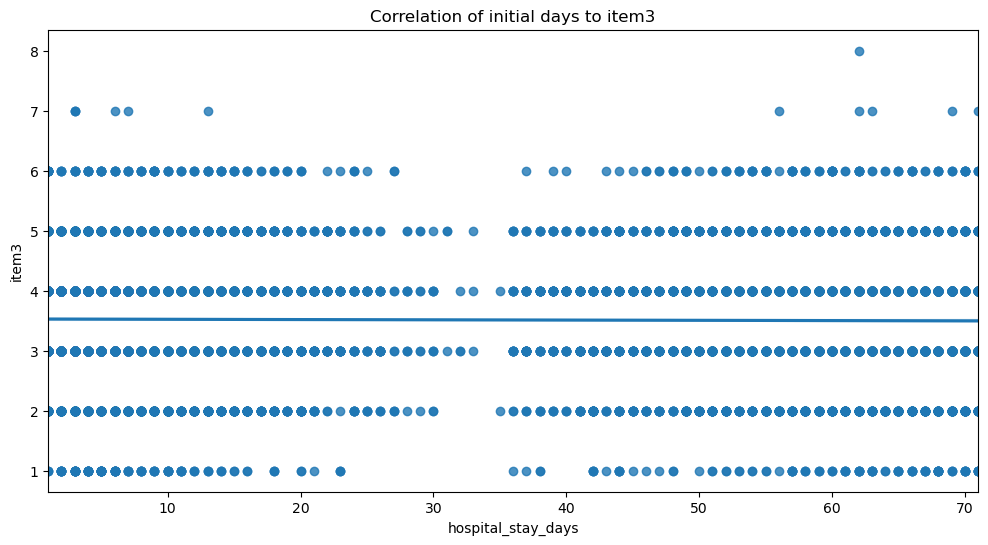

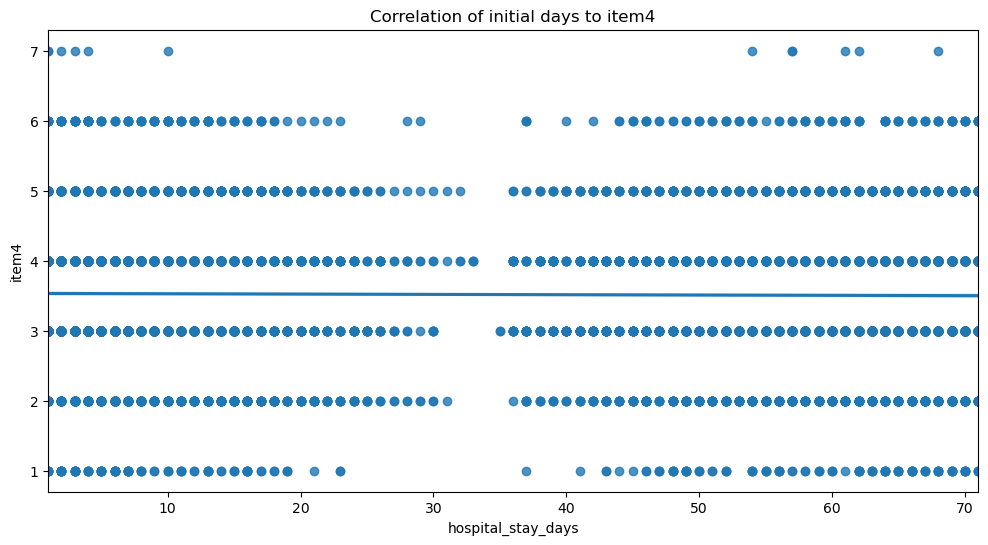

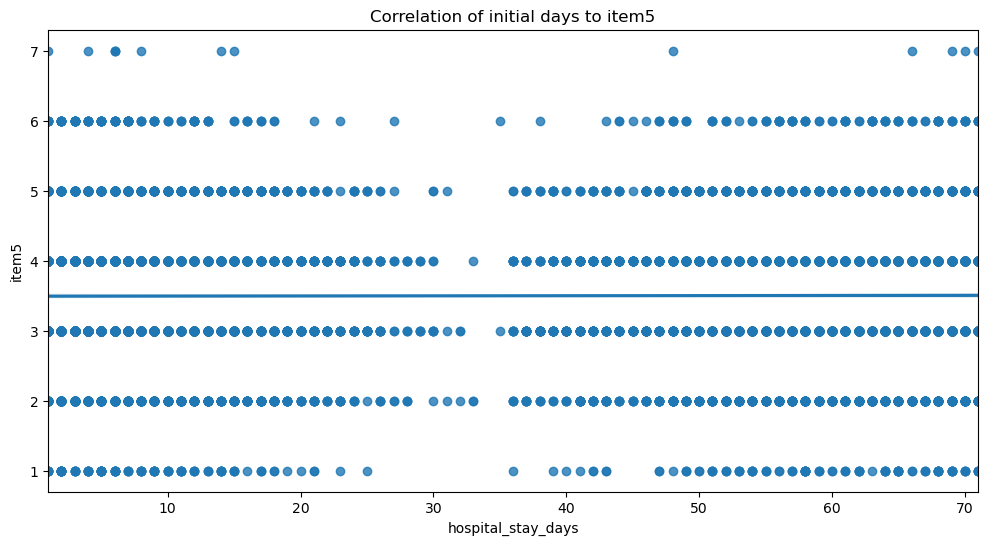

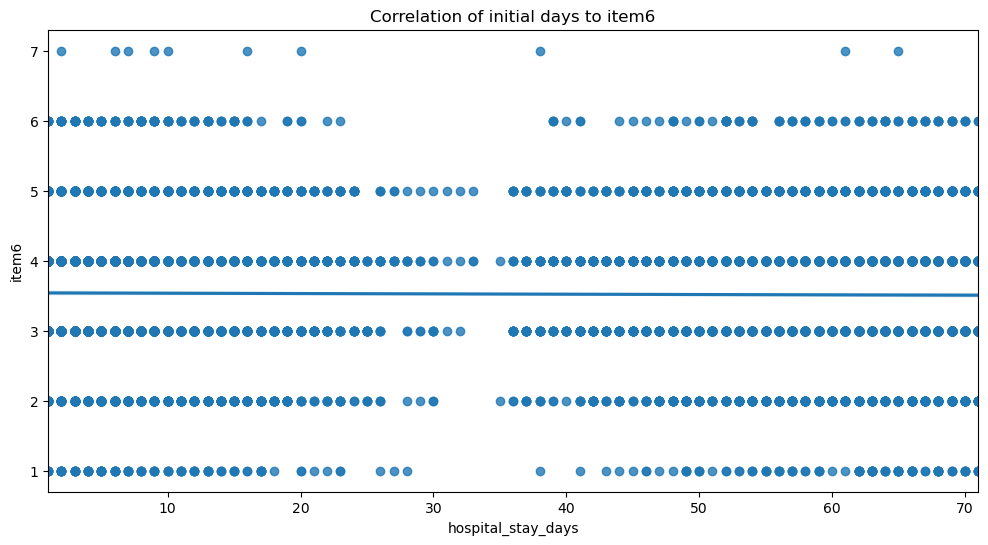

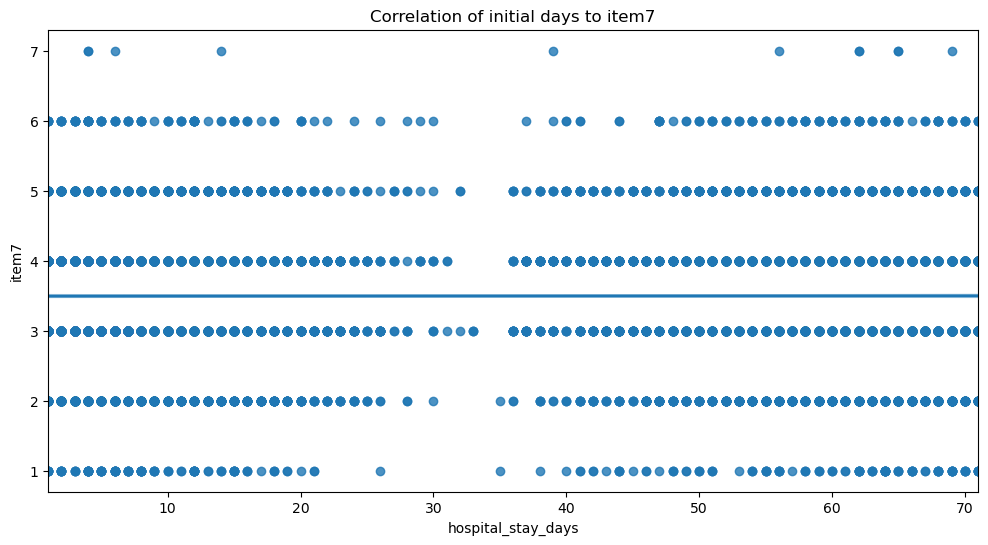

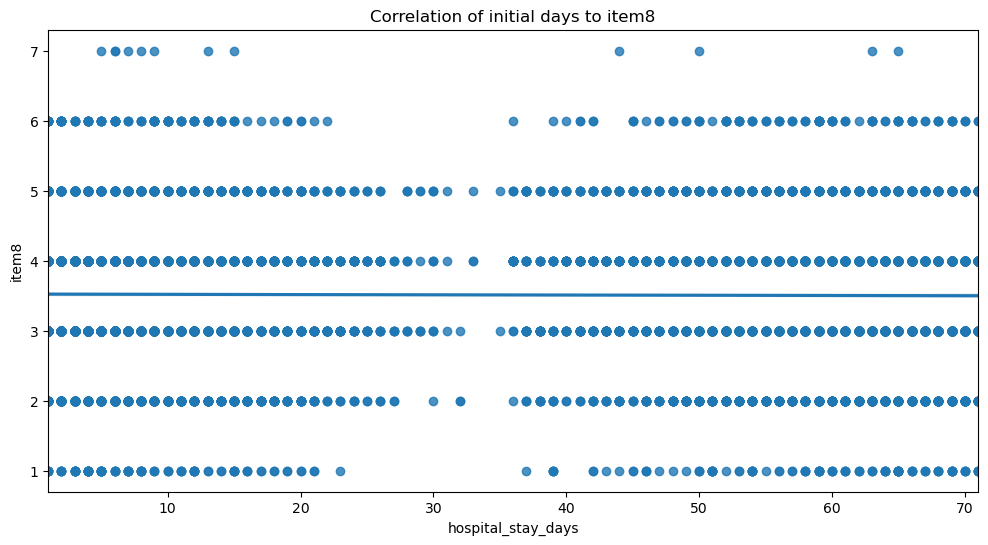

In [14]:
for i in cont_vars:
    plt.figure(figsize=(12,6))
    sns.regplot(data=df, x=df['hospital_stay_days'], y=i)
    plt.title(f'Correlation of initial days to {i}')
    plt.show()

***Continuous to Categorical Variables***

gender to hospital_stay_days


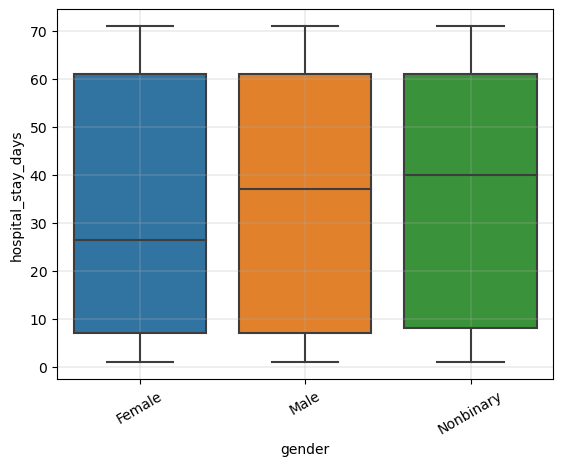

marital to hospital_stay_days


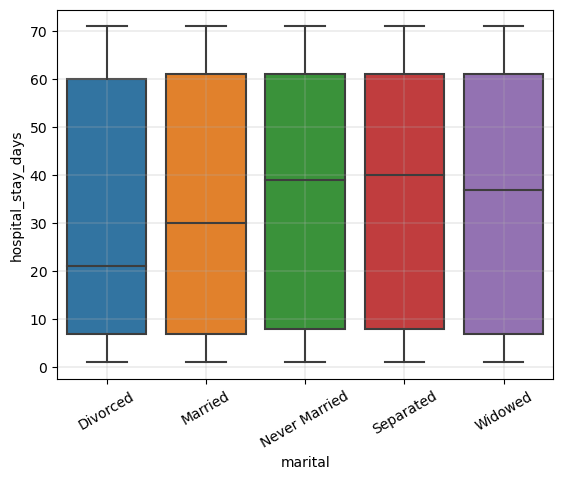

area to hospital_stay_days


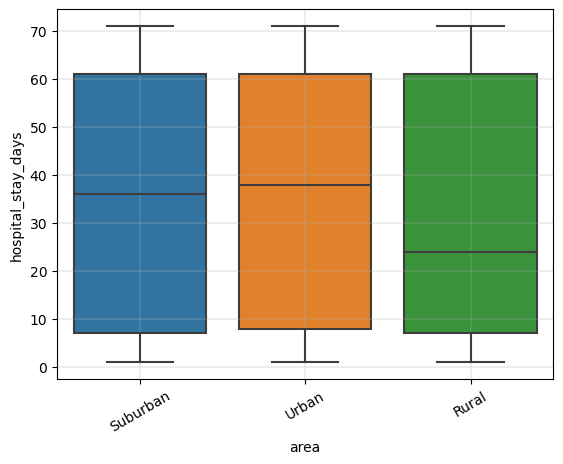

timezone to hospital_stay_days


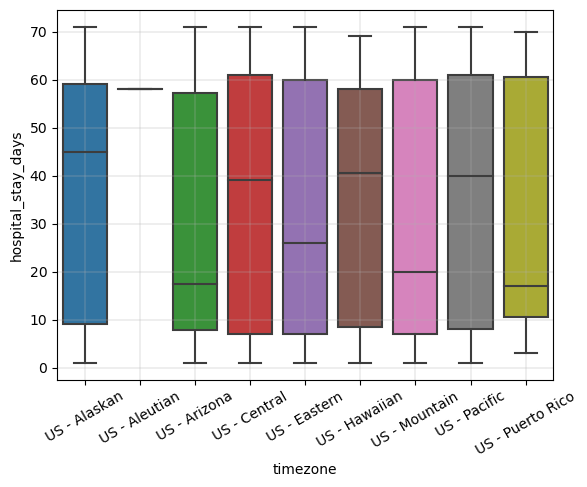

initial_admin to hospital_stay_days


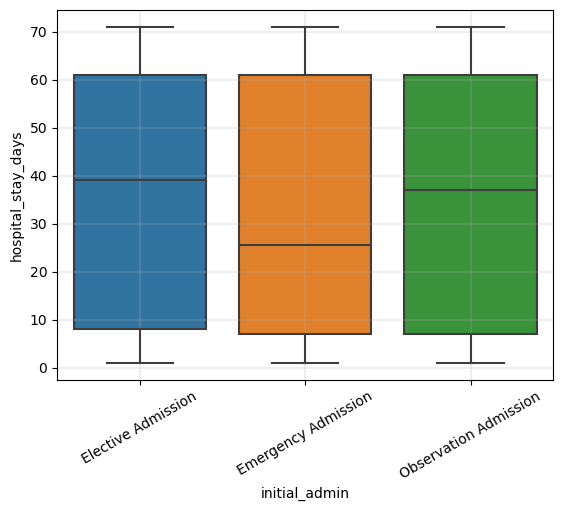

complication_risk to hospital_stay_days


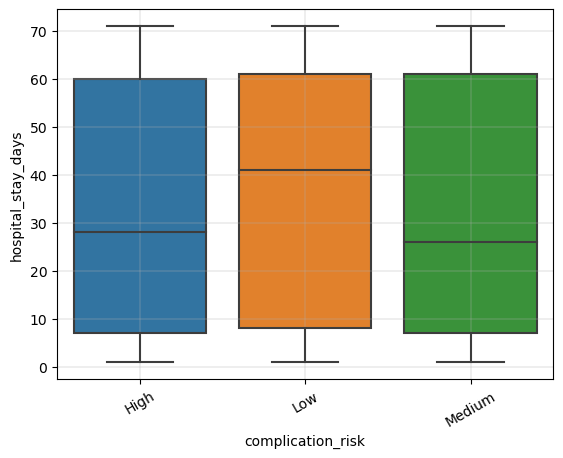

services_received to hospital_stay_days


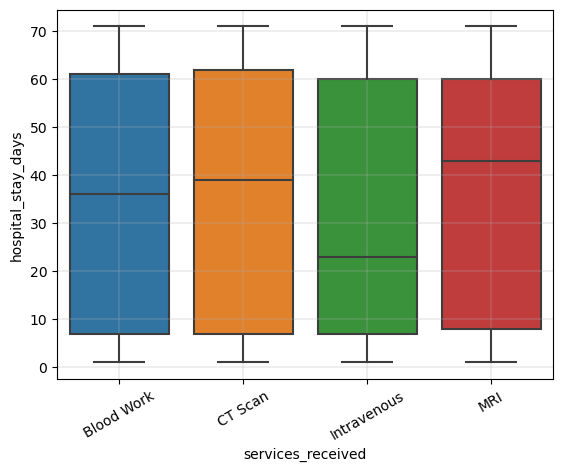

In [15]:
for i in cat_vars:
    print(f'{i} to hospital_stay_days')
    sns.boxplot(data=df, x=i, y='hospital_stay_days')
    plt.xticks(rotation=30)
    plt.grid(linewidth=0.3)
    plt.show()

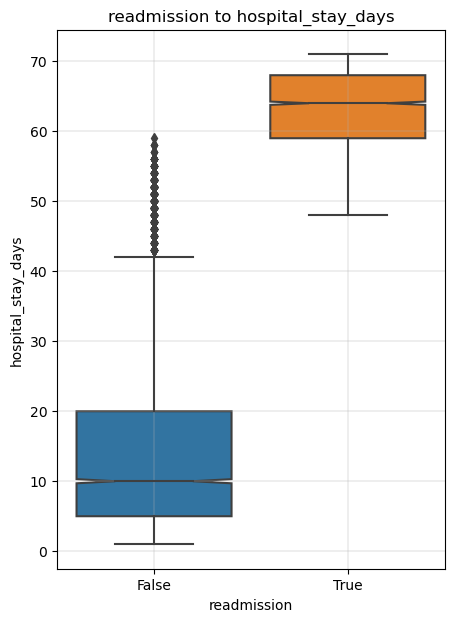

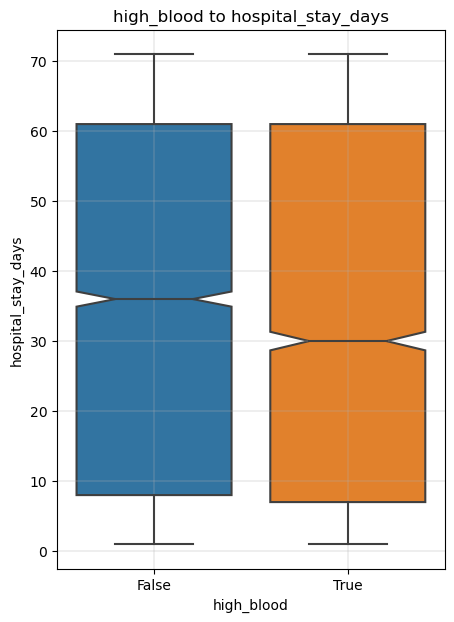

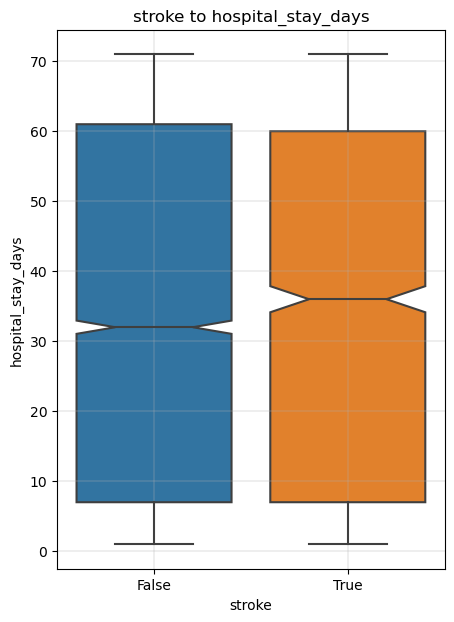

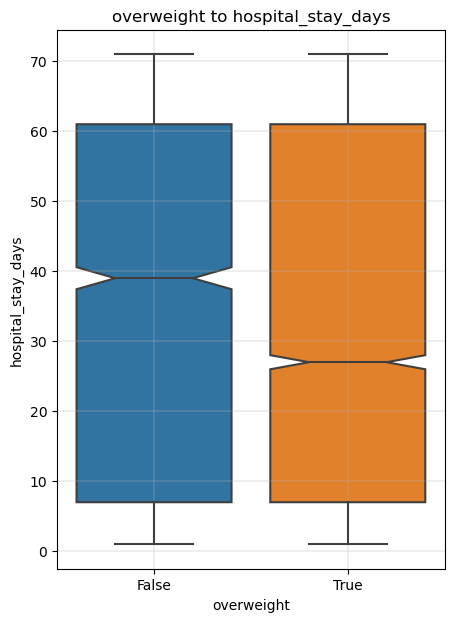

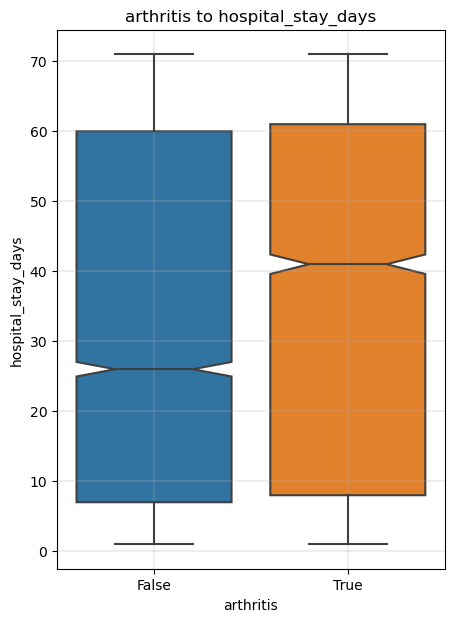

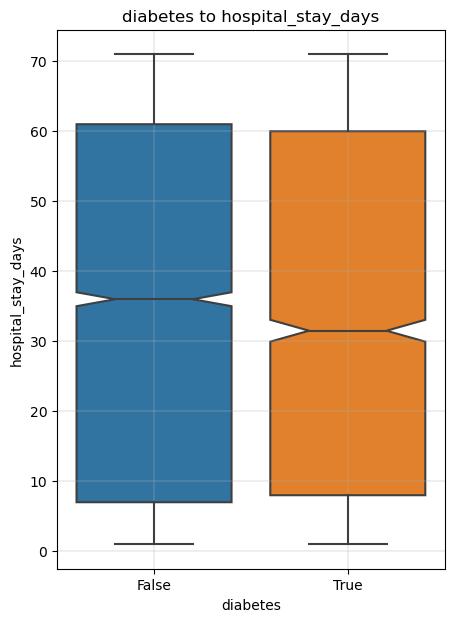

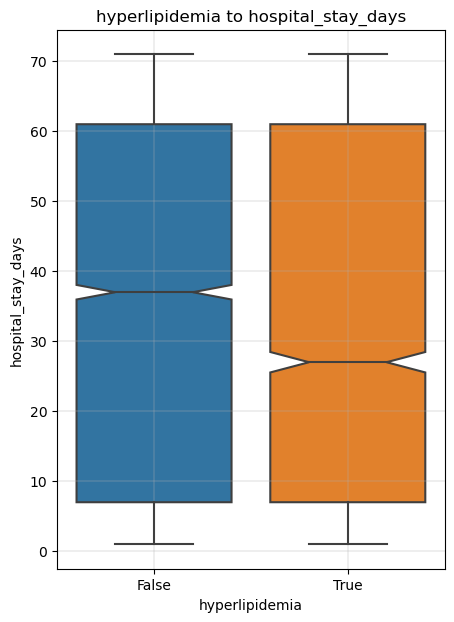

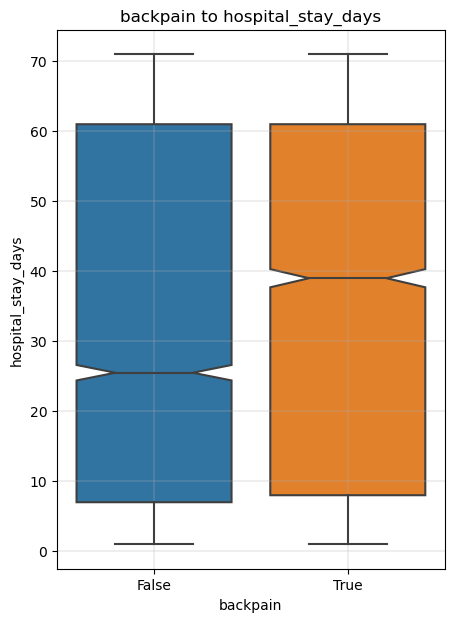

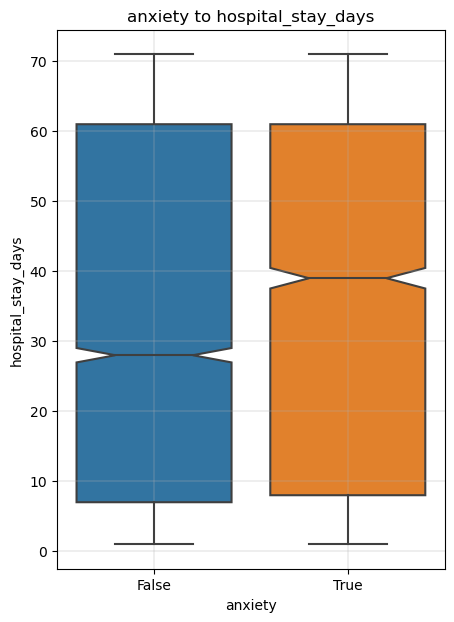

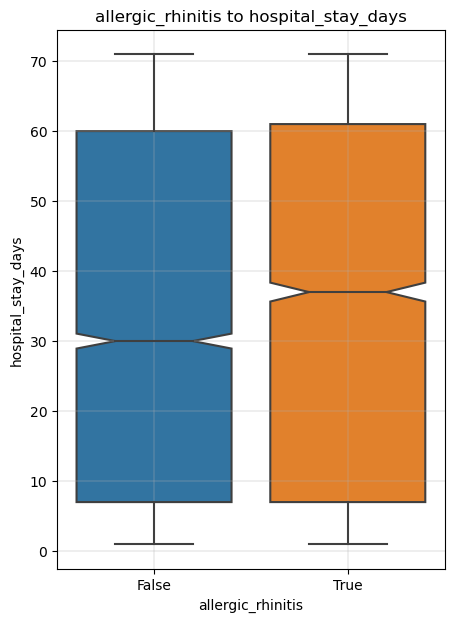

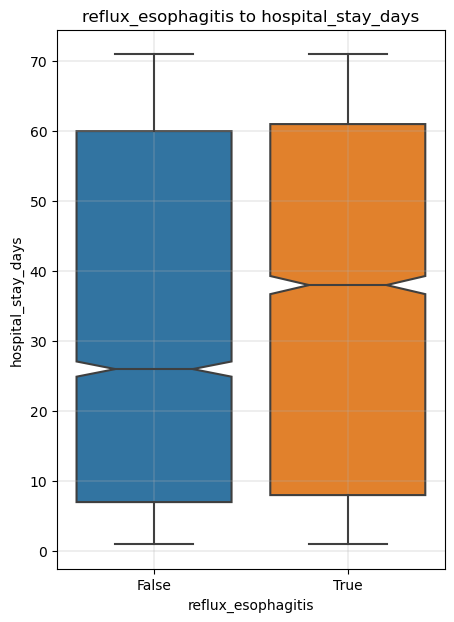

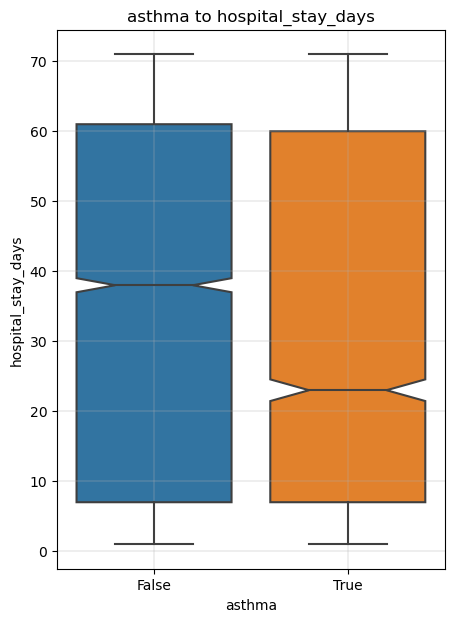

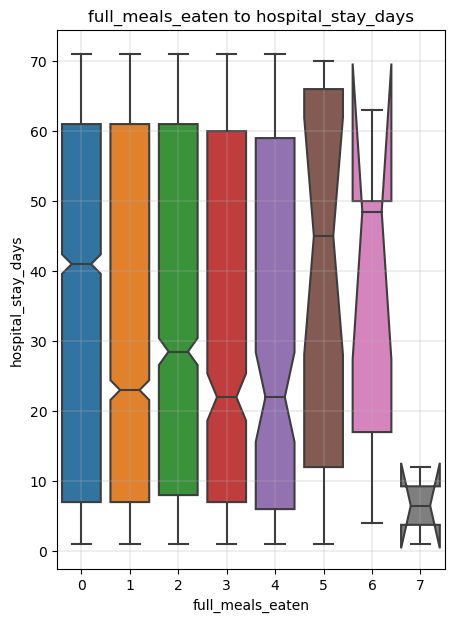

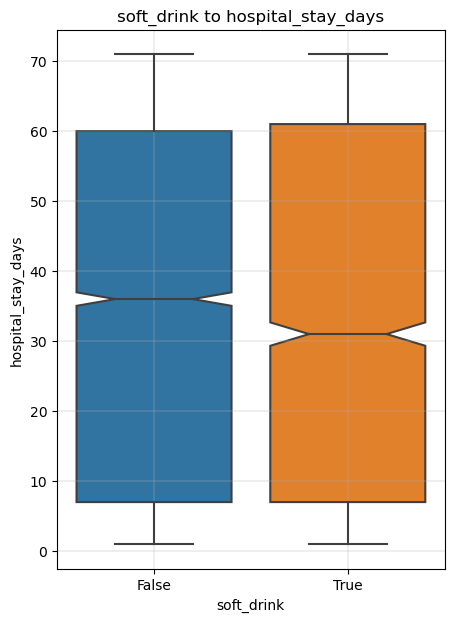

In [16]:
for i in boolean_vars:
    plt.figure(figsize=(5,7))
    sns.boxplot(x=i, y='hospital_stay_days', data=df, notch=True)
    plt.title(f'{i} to hospital_stay_days')
    plt.grid(linewidth=0.3)
    plt.show()

In [17]:
df.columns.tolist()

['CaseOrder',
 'customer_id',
 'interaction',
 'unique_id',
 'city',
 'state',
 'county',
 'zip',
 'lat',
 'lng',
 'population',
 'area',
 'timezone',
 'job',
 'children',
 'age',
 'income',
 'marital',
 'gender',
 'readmission',
 'vitd_levels',
 'doc_visits',
 'full_meals_eaten',
 'vitd_supplement',
 'soft_drink',
 'initial_admin',
 'high_blood',
 'stroke',
 'complication_risk',
 'overweight',
 'arthritis',
 'diabetes',
 'hyperlipidemia',
 'backpain',
 'anxiety',
 'allergic_rhinitis',
 'reflux_esophagitis',
 'asthma',
 'services_received',
 'hospital_stay_days',
 'daily_charges',
 'additional_charges',
 'item1',
 'item2',
 'item3',
 'item4',
 'item5',
 'item6',
 'item7',
 'item8']

***Quick Scope*** look for multicollinearity

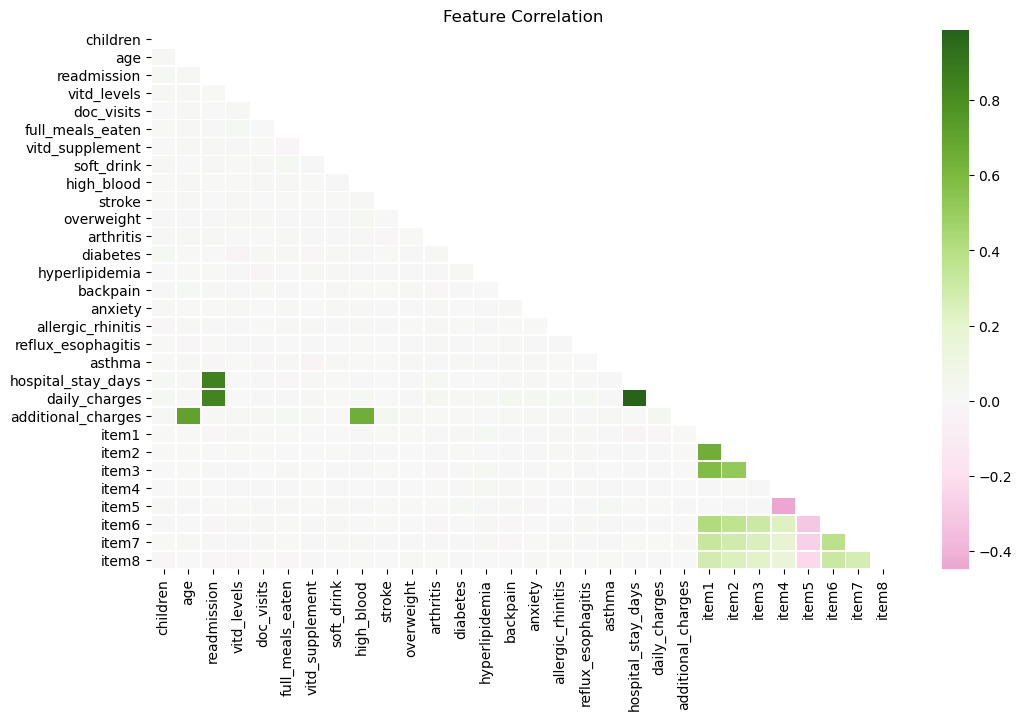

In [18]:
# take a look at a corner heatmap to assess correlation of independent variables
numerical = df.drop(columns=['CaseOrder',
                             'customer_id',
                             'interaction',
                             'unique_id',
                             'city',
                             'state',
                             'county',
                             'zip',
                             'lat',
                             'lng',
                             'population',
                             'income',
                             'job'])
corr = numerical.corr()


plt.figure(figsize=(12,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, center=0, linewidths=.5, cmap="PiYG", mask=mask)
plt.title('Feature Correlation')
plt.show()

There's a suspicion of daily_cahrges and readmission having strong multicollinearity

### C4.  Describe your data transformation goals that align with your research question and the steps used to transform the data to achieve the goals, including the annotated code.

In order to prepare the data for modeling there a few required steps. Algorithms are not built to read text. So to start all data must be transformed into readable numerical values.

Continuous numerical values must be scaled for the model to score properly. Discrete features normally have a small range (e.g. 0 to 5) and can often be used directly in the model without scaling, as they do not typically cause issues with the model's performance or interpretation. In this scenario, the discrete features all have larger ranges and will be included in scaling. Scaling to all numerical features will be applied to ensure balanced contributions and avoid skewing the model. 

Categorical variables will be engineered into binary dummy columns, representing each unique value within that feature. This process will ensure categorical data is correctly encoded for the model. Columns with Yes/No values will be transformed into 1/0, respectively to simplify their representation as boolean features.

Unique identifiers such as customer_id, interaction and unique_id are removed as they have no relevance to the prediction of stay. Other columns such as those related to location (e.g., city, state, zip) and variables like income and job, will also be omitted in this iteration for ethical considerations and practical analysis constraints. The job feature in particular, contains a large variety of values, making it less efficient to create dummy variables for each category. Instead, methods like clustering or binning could be explored in the future to group jobs meaningfully. Given that this is a minimum viable product (MVP) model, such advanced pre-processing steps can be deferred until necessary or later stages.

As previously stated, hese columns below will be excluded from our initial model.

In [19]:
## remove unnecessary columns not used for modeling
remove_cols = ['CaseOrder',
               'customer_id',
               'interaction',
               'unique_id',
               'city',
               'state',
               'county',
               'zip',
               'lat',
               'lng',
               'income',
               'job',
               'timezone']

df.drop(columns = remove_cols, inplace=True)

#### Nominal Categorical Features

The columns listed below are nominal categorical variables, meaning they represent categories without any inherent order or ranking. For use in a linear regression model, these categorical variables need to be transformed into numerical representations. However, assigning arbitrary numerical values to each category (e.g., 1 for female and 2 for male) would incorrectly imply a meaningful order, which could mislead the model. To address this, we use dummy variables, which convert each category into a binary (0 or 1) representation, ensuring that no ordinal relationship is inferred between the categories. This process enables the model to correctly interpret the categorical data without the issue of bias.

In [20]:
# dummify nominal
to_dummy = ['gender'
           ,'marital'
           ,'initial_admin'
           ,'services_received'
           ,'complication_risk'
           ,'area']

# Create dummies for the specified columns
dummy_df = pd.get_dummies(df[to_dummy], drop_first=True)
# Concatenate the original dataframe with the dummies
df = pd.concat([df, dummy_df], axis=1)

In [21]:
df[to_dummy].sample(5)

gender        marital          initial_admin services_received  \
8105  Female        Married    Emergency Admission        Blood Work   
329     Male       Divorced  Observation Admission        Blood Work   
3091  Female       Divorced  Observation Admission       Intravenous   
1195  Female  Never Married     Elective Admission        Blood Work   
8673  Female        Widowed     Elective Admission        Blood Work   

     complication_risk      area  
8105            Medium     Rural  
329               High     Urban  
3091            Medium     Urban  
1195               Low     Rural  
8673              High  Suburban

In [22]:
# # drop the original columns 
df.drop(columns = to_dummy, inplace=True)

#### Scaling Numerical Values

The below list `to_scale` is the list of features I will scale. Scaling (also known as standardizing) numerical values is necessary for the model particularly because linear regression models estimate coefficients for the independent variables. These coefficients represent the effect of each feature on the dependent variable. When numerical values (particularly continuous) with a heirarchy ranking order have a large enough range, it is necessary to scale them so the models do not mdisproportionately assign coefficients that cause an imbalance in the scale. As a result, this helps the model treat all continuous equally.

There are several methods for scaling data, each with different applications. The `MinMaxScaler()` from `sklearn` scales numerical values to a range between 0 and 1. Another favorite method of mine is the `RobustScaler()` which is particularly useful for datasets with outliers. It sets the median to 0 and scales the data using the interquartile range (IQR), making it more robust to outliers. Since this dataset does not contain many outliers, I opted for the `MinMaxScaler()`.

In [23]:
# scale continuous values (discrete on a case by case depending on range)
to_scale = ['age'
            ,'vitd_levels'
            ,'daily_charges'
            ,'additional_charges'
            ,'population'
            ,'children'
            ,'doc_visits'
            ,'full_meals_eaten'
            ,'vitd_supplement'
            ,'item1'
            ,'item2'
            ,'item3'
            ,'item4'
            ,'item5'
            ,'item6'
            ,'item7'
            ,'item8']

print(df[to_scale].dtypes)
df[to_scale].describe().T

age                     int32
vitd_levels           float64
daily_charges         float64
additional_charges    float64
population              int32
children                int32
doc_visits              int64
full_meals_eaten        int64
vitd_supplement         int64
item1                   int32
item2                   int32
item3                   int32
item4                   int32
item5                   int32
item6                   int32
item7                   int32
item8                   int32
dtype: object


count          mean           std      min        25%  \
age                 10000.0     53.511700     20.638538    18.00    36.0000   
vitd_levels         10000.0     17.964272      2.017259     9.81    16.6275   
daily_charges       10000.0   5312.172758   2180.393815  1938.31  3179.3750   
additional_charges  10000.0  12934.528592   6542.601554  3125.70  7986.4850   
population          10000.0   9965.253800  14824.758614     0.00   694.7500   
children            10000.0      2.097200      2.163659     0.00     0.0000   
doc_visits          10000.0      5.012200      1.045734     1.00     4.0000   
full_meals_eaten    10000.0      1.001400      1.008117     0.00     0.0000   
vitd_supplement     10000.0      0.398900      0.628505     0.00     0.0000   
item1               10000.0      3.518800      1.031966     1.00     3.0000   
item2               10000.0      3.506700      1.034825     1.00     3.0000   
item3               10000.0      3.511100      1.032755     1.00     3.0000   
item4               10000.0      3.515100      1.036282     1.00     3.0000   
item5               10000.0      3.496900      1.030192     1.00     3.0000   
item6               10000.0      3.522500      1.032376     1.00     3.0000   
item7               10000.0      3.494000      1.021405     1.00     3.0000   
item8               10000.0      3.509700      1.042312     1.00     3.0000   

                         50%       75%        max  
age                    53.00     71.00      89.00  
vitd_levels            17.95     19.35      26.39  
daily_charges        5213.95   7459.70    9180.73  
additional_charges  11573.98  15626.49   30566.07  
population           2769.00  13945.00  122814.00  
children                1.00      3.00      10.00  
doc_visits              5.00      6.00       9.00  
full_meals_eaten        1.00      2.00       7.00  
vitd_supplement         0.00      1.00       5.00  
item1                   4.00      4.00       8.00  
item2                   3.00      4.00       7.00  
item3                   4.00      4.00       8.00  
item4                   4.00      4.00       7.00  
item5                   3.00      4.00       7.00  
item6                   4.00      4.00       7.00  
item7                   3.00      4.00       7.00  
item8                   3.00      4.00       7.00

In [24]:
# assign scaler
scaler = MinMaxScaler()
# run scale function on columns to scale
df[to_scale] = scaler.fit_transform(df[to_scale])
# quick visual
df[to_scale].describe().T

count      mean       std  min       25%       50%  \
age                 10000.0  0.500165  0.290684  0.0  0.253521  0.492958   
vitd_levels         10000.0  0.491814  0.121668  0.0  0.411188  0.490953   
daily_charges       10000.0  0.465847  0.301059  0.0  0.171361  0.452285   
additional_charges  10000.0  0.357460  0.238430  0.0  0.177140  0.307878   
population          10000.0  0.081141  0.120709  0.0  0.005657  0.022546   
children            10000.0  0.209720  0.216366  0.0  0.000000  0.100000   
doc_visits          10000.0  0.501525  0.130717  0.0  0.375000  0.500000   
full_meals_eaten    10000.0  0.143057  0.144017  0.0  0.000000  0.142857   
vitd_supplement     10000.0  0.079780  0.125701  0.0  0.000000  0.000000   
item1               10000.0  0.359829  0.147424  0.0  0.285714  0.428571   
item2               10000.0  0.417783  0.172471  0.0  0.333333  0.333333   
item3               10000.0  0.358729  0.147536  0.0  0.285714  0.428571   
item4               10000.0  0.419183  0.172714  0.0  0.333333  0.500000   
item5               10000.0  0.416150  0.171699  0.0  0.333333  0.333333   
item6               10000.0  0.420417  0.172063  0.0  0.333333  0.500000   
item7               10000.0  0.415667  0.170234  0.0  0.333333  0.333333   
item8               10000.0  0.418283  0.173719  0.0  0.333333  0.333333   

                         75%  max  
age                 0.746479  1.0  
vitd_levels         0.575392  1.0  
daily_charges       0.762368  1.0  
additional_charges  0.455562  1.0  
population          0.113546  1.0  
children            0.300000  1.0  
doc_visits          0.625000  1.0  
full_meals_eaten    0.285714  1.0  
vitd_supplement     0.200000  1.0  
item1               0.428571  1.0  
item2               0.500000  1.0  
item3               0.428571  1.0  
item4               0.500000  1.0  
item5               0.500000  1.0  
item6               0.500000  1.0  
item7               0.500000  1.0  
item8               0.500000  1.0

#### Boolean Value Prep

In linear regression, boolean values are handled by converting them to binary numerical values (1, 0). This conversion allows the model to use these columns as features. For a boolean feature, such as whether a person is ***overweight***, the coefficient in the regression model represents the effect of that feature being `True` compared to `False`. Specifically if the boolean is True, the model adds the value of the coefficient to the prediction. However, if False, it does not affect the prediction (e.g. $weight 0 x = 0)$.

In [25]:
# change boolean to binary
binary = ['readmission'
         ,'high_blood'
         ,'stroke'
         ,'overweight'
         ,'arthritis'
         ,'diabetes'
         ,'hyperlipidemia'
         ,'backpain'
         ,'anxiety'
         ,'allergic_rhinitis'
         ,'reflux_esophagitis'
         ,'asthma'
         ,'soft_drink']

# replace True with 1's and False with 0's
df[binary] = df[binary].replace(True, 1)
df[binary] = df[binary].replace(False, 0)

In [26]:
# confirm all flag columns
df[binary].head().T

0  1  2  3  4
readmission         0  0  0  0  0
high_blood          1  1  1  0  0
stroke              0  0  0  1  0
overweight          0  1  1  0  0
arthritis           1  0  0  1  0
diabetes            1  0  1  0  0
hyperlipidemia      0  0  0  0  1
backpain            1  0  0  0  0
anxiety             1  0  0  0  0
allergic_rhinitis   1  0  0  0  1
reflux_esophagitis  0  1  0  1  0
asthma              1  0  0  1  0
soft_drink          0  0  0  0  1

### C5.  CSV file.

In [27]:
# df.to_csv('finalized_df.csv')
# read back in if needed
# df = pd.read_csv('finalized_df.csv')

## Part IV: Model Comparison & Analysis
Compare an initial and a reduced linear regression model by doing the following:

### D1. Initial Regression Model.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 46 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   population                           10000 non-null  float64
 1   children                             10000 non-null  float64
 2   age                                  10000 non-null  float64
 3   readmission                          10000 non-null  int64  
 4   vitd_levels                          10000 non-null  float64
 5   doc_visits                           10000 non-null  float64
 6   full_meals_eaten                     10000 non-null  float64
 7   vitd_supplement                      10000 non-null  float64
 8   soft_drink                           10000 non-null  int64  
 9   high_blood                           10000 non-null  int64  
 10  stroke                               10000 non-null  int64  
 11  overweight                   

#### Shuffle/Split
Splitting data for modeling is essential to ensure the model's ability to generalize an algorithm on training data and test true accuracy on unseen data. By dividing the dataset into training, validation and test sets, the model is trained on one portion (the training set) and then evaluated on another portion (the validation set) that it has not seen before. 

The test set is always save for last and shall only be tested once and only once. This allows for an unbiased assessment of the model's true performance and helps to prevent overfitting, where the model performs well on training data but poorly on new unseen data.

In [29]:
train_validate, test = train_test_split(df,
                                        test_size=.2, 
                                        random_state=314,
                                        shuffle=True)

train, validate = train_test_split(train_validate,
                                   test_size=.3, 
                                   random_state=314,
                                   shuffle=True)


print(f'Train shape ---> {train.shape}')
print(f'Validate shape ---> {validate.shape}')
print(f'Test shape ---> {test.shape}')

Train shape ---> (5600, 46)
Validate shape ---> (2400, 46)
Test shape ---> (2000, 46)


In [30]:
X_train = train.drop(columns='hospital_stay_days')
X_validate = validate.drop(columns='hospital_stay_days')
X_test = test.drop(columns='hospital_stay_days')

y_train = train.hospital_stay_days
y_validate = validate.hospital_stay_days
y_test = test.hospital_stay_days

y_train = pd.DataFrame(y_train)
y_validate= pd.DataFrame(y_validate)
y_test = pd.DataFrame(y_test)

In [31]:
# scores_df = pd.DataFrame()

In [32]:
# algo = LinearRegression(normalize=True)
# target = 'hospital_stay_days'
# model_name = 'linear_reg'

# # fit the model using the algorithm
# algo.fit(X_train, y_train[target])

# # predict train
# y_train[model_name] = algo.predict(X_train)

# # evaluate: rmse
# rmse_train = mean_squared_error(y_train[target], y_train[model_name])**(1/2)

# # predict validate
# # y_validate[model_name] = algo.predict(X_validate)

# # evaluate: rmse
# rmse_validate = mean_squared_error(y_validate[target], y_validate[model_name])**(1/2)

# print("RMSE for", model_name, "using", algo, "\nTraining/In-Sample: ", rmse_train, 
#       "\nValidation/Out-of-Sample: ", rmse_validate)

In [33]:
# include y intercept using add_constant() function
X_train_baseline = sm.add_constant(X_train)
X_validate_baseline = sm.add_constant(X_validate)
X_test_baseline = sm.add_constant(X_test)

model_baseline = sm.OLS(y_train, X_train_baseline).fit()
model_baseline.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     hospital_stay_days   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.031e+06
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:15:46   Log-Likelihood:                -948.76
No. Observations:                5600   AIC:                             1990.
Df Residuals:                    5554   BIC:                             2295.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                  -4.4924      0.039   -115.060      0.000      -4.569      -4.416
population                              0.0225      0.032      0.707      0.479      -0.040       0.085
children                                0.0088      0.018      0.493      0.622      -0.026       0.044
age                                     0.0161      0.041      0.398      0.691      -0.063       0.096
readmission                            -0.0418      0.015     -2.755      0.006      -0.072      -0.012
vitd_levels                            -0.0415      0.032     -1.299      0.194      -0.104       0.021
doc_visits                             -0.0287      0.030     -0.970      0.332      -0.087       0.029
full_meals_eaten                       -0.0089      0.027     -0.331      0.741      -0.062       0.044
vitd_supplement                        -0.0161      0.031     -0.519      0.604      -0.077       0.045
soft_drink                             -0.0022      0.009     -0.251      0.802      -0.019       0.015
high_blood                             -1.3733      0.022    -62.297      0.000      -1.417      -1.330
stroke                                  0.0004      0.010      0.045      0.964      -0.019       0.019
overweight                             -0.0043      0.008     -0.509      0.611      -0.021       0.012
arthritis                              -0.8764      0.008   -108.825      0.000      -0.892      -0.861
diabetes                               -0.9127      0.009   -104.241      0.000      -0.930      -0.896
hyperlipidemia                         -1.1508      0.008   -141.163      0.000      -1.167      -1.135
backpain                               -1.0366      0.008   -131.735      0.000      -1.052      -1.021
anxiety                                -1.0549      0.008   -127.411      0.000      -1.071      -1.039
allergic_rhinitis                      -0.7440      0.008    -94.293      0.000      -0.759      -0.729
reflux_esophagitis                     -0.7218      0.008    -91.905      0.000      -0.737      -0.706
asthma                                 -0.0020      0.009     -0.238      0.812      -0.019       0.015
daily_charges                          88.4121      0.025   3583.083      0.000      88.364      88.460
additional_charges                      0.0006      0.066      0.009      0.993      -0.128       0.129
item1                                   0.0107      0.039      0.275      0.783      -0.066       0.087
item2                                   0.0115      0.031      0.370      0.712      -0.049       0.072
item3                                  -0.0454      0.033     -1.378      0.168      -0.110       0.019
item4                                   0.0608      0.025      2.41

### D2. Model Reduction Justification
Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question.

#### Initial Model Takeaways
- The feature columns with p-value <0.05 prove to have enough significance on the dependent variable. Thus it is a good start to move forward with those features and check for multicollinearity.

In [34]:
final_features = ['readmission'
                 ,'high_blood'
                 ,'arthritis'
                 ,'diabetes'
                 ,'hyperlipidemia'
                 ,'backpain'
                 ,'anxiety'
                 ,'allergic_rhinitis'
                 ,'reflux_esophagitis'
                 ,'daily_charges'
                 ,'item4'
                 ,'initial_admin_Emergency Admission'
                 ,'complication_risk_Low'
                 ,'complication_risk_Medium']


X_train = X_train[final_features]
X_validate = X_validate[final_features]
X_test = X_test[final_features]

In [35]:
vif = pd.DataFrame()
vif['feature'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif

feature        VIF
0                         readmission   5.336762
1                          high_blood   1.629035
2                           arthritis   1.540221
3                            diabetes   1.342580
4                      hyperlipidemia   1.484206
5                            backpain   1.670676
6                             anxiety   1.446434
7                   allergic_rhinitis   1.609230
8                  reflux_esophagitis   1.647303
9                       daily_charges  10.696493
10                              item4   4.543477
11  initial_admin_Emergency Admission   2.065299
12              complication_risk_Low   1.492659
13           complication_risk_Medium   2.082852

In [36]:
# removing daily_charge
X_train = X_train.drop(columns=['daily_charges'])
X_validate = X_validate.drop(columns=['daily_charges'])
X_test = X_test.drop(columns=['daily_charges'])

In [37]:
vif = pd.DataFrame()
vif['feature'] = X_train.columns

vif['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif

feature       VIF
0                         readmission  1.527450
1                          high_blood  1.610854
2                           arthritis  1.517718
3                            diabetes  1.330973
4                      hyperlipidemia  1.475078
5                            backpain  1.642939
6                             anxiety  1.426649
7                   allergic_rhinitis  1.583803
8                  reflux_esophagitis  1.623646
9                               item4  4.221764
10  initial_admin_Emergency Admission  1.920579
11              complication_risk_Low  1.492076
12           complication_risk_Medium  2.082542

***Confirm no more signs of multicollinearity***

### D3.  Reduced Linear Model
Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model.

In [38]:
# include y intercept using add_constant() function
X_train = sm.add_constant(X_train)

model_reduced = sm.OLS(y_train, X_train).fit()
model_reduced.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     hospital_stay_days   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1114.
Date:                Sat, 07 Sep 2024   Prob (F-statistic):               0.00
Time:                        21:15:46   Log-Likelihood:                -22656.
No. Observations:                5600   AIC:                         4.534e+04
Df Residuals:                    5586   BIC:                         4.543e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                18.3051      0.719     25.476      0.000      16.897      19.714
readmission                          46.1493      0.384    120.071      0.000      45.396      46.903
high_blood                           -0.7424      0.377     -1.967      0.049      -1.482      -0.003
arthritis                             0.7462      0.386      1.934      0.053      -0.010       1.503
diabetes                              0.1985      0.419      0.473      0.636      -0.624       1.021
hyperlipidemia                       -0.7941      0.391     -2.031      0.042      -1.560      -0.028
backpain                              0.5286      0.376      1.405      0.160      -0.209       1.266
anxiety                               0.4523      0.397      1.140      0.254      -0.325       1.230
allergic_rhinitis                     0.3523      0.378      0.931      0.352      -0.389       1.094
reflux_esophagitis                    0.3587      0.376      0.953      0.340      -0.379       1.096
item4                                -2.5225      1.069     -2.359      0.018      -4.618      -0.427
initial_admin_Emergency Admission    -1.3569      0.371     -3.662      0.000      -2.083      -0.631
complication_risk_Low                 0.9922      0.516      1.924      0.054      -0.019       2.003
complication_risk_Medium              0.0312      0.422      0.074      0.941      -0.795       0.858
==============================================================================
Omnibus:                     1050.700   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1736.866
Skew:                           1.290   Prob(JB):                         0.00
Kurtosis:                       3.886   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### E.  Analyze the data set using your reduced linear regression model by doing the following:

### E1.  Comparison: Initial v. Reduced Model
- The initial model with an $R^2$ of 1.00, perfectly fit the training data but was very likely overfitted, meaning it likely did not generalize well to new data. In other words, the model failed to produce a legitimate algorithm and instead "memorized" the data, in a sense. As a result, the score on unseen data would be inaccurate and wildly different from the training score.


-   The reduced model, with an $R^2$ of 0.72, explains 72% of the variance and is likely more robust and generalized. While the initial model's perfect fit suggested overfitting, the revised model provides a solid balance between fit and generalization. Further evaluation and testing the data is needed to confirm the revised model’s performance.


***Initial Baseline Model***

In [45]:
model_baseline = sm.OLS(y_train, X_train_baseline).fit()
y_pred_initial = model_baseline.predict(X_validate_baseline)
r2_score(y_true=y_validate, y_pred=y_pred_initial)

0.999875473090556

In [47]:
y_pred_reduced = model_reduced.predict(X_validate)
r2_score(y_true=y_validate, y_pred=y_pred_reduced)

0.7259086035920443

### E2.  Provide the output and all calculations of the analysis you performed, including the following elements for your reduced linear regression model:

•   a residual plot

•   the model’s residual standard error

In [57]:
residuals_base

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9991   NaN
9995   NaN
9996   NaN
9997   NaN
9999   NaN
Length: 8000, dtype: float64

ValueError: Data must be 1-dimensional

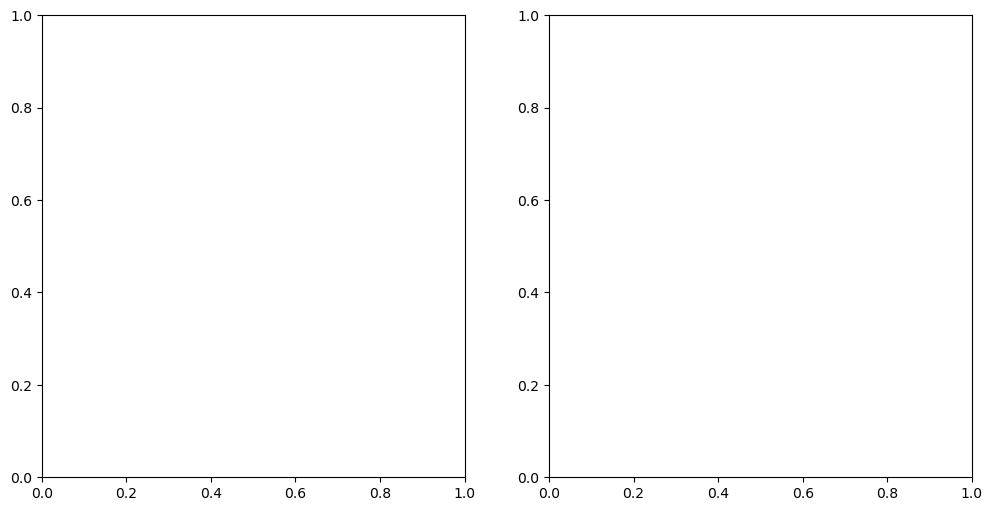

In [58]:
residuals_base = np.array(y_train) - np.array(y_pred_initial)
residuals_reduced = y_train.hospital_stay_days - y_pred_reduced


# Create subplots to compare residuals
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Residual plot for Model 1
sns.scatterplot(x=y_pred_initial, y=residuals_base, ax=axes[0])
axes[0].axhline(0, color='red', linestyle='--')
axes[0].set_title('Residuals of Base Model (R^2=1.00)')
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')

# Residual plot for Model 2
sns.scatterplot(x=y_pred_reduced, y=residuals_reduced, ax=axes[1])
axes[1].axhline(0, color='red', linestyle='--')
axes[1].set_title('Residuals of Reduced Model (R^2=0.72)')
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()

### E3.  Provide an executable error-free copy of the code used to support the implementation of the linear regression models using a Python or R file.

## Part V: Data Summary and Implications

F.  Summarize your findings and assumptions by doing the following:

1.  Discuss the results of your data analysis, including the following elements:

•   a regression equation for the reduced model

•   an interpretation of the coefficients of the reduced model

•   the statistical and practical significance of the reduced model

•   the limitations of the data analysis

2.  Recommend a course of action based on your results.



#### Final Test

In [60]:
X_test2 = sm.add_constant(X_test)
y_pred2 = model_2.predict(X_test2)
r2_score(y_true=y_test, y_pred=y_pred2)

0.7341430134176901



Part VI: Demonstration

G.  Provide a Panopto video recording that includes the presenter and a vocalized demonstration of the functionality of the code used for the analysis of the programming environment, including the following elements:

•   an identification of the version of the programming environment

•   a comparison of the initial multiple linear regression model you used and the reduced linear regression model you used in your analysis

•   an interpretation of the coefficients of the reduced model


Note: The audiovisual recording should feature you visibly presenting the material (i.e., not in voiceover or embedded video) and should simultaneously capture both you and your multimedia presentation.


Note: For instructions on how to access and use Panopto, use the "Panopto How-To Videos" web link provided below. To access Panopto's website, navigate to the web link titled "Panopto Access," and then choose to log in using the “WGU” option. If prompted, log in using your WGU student portal credentials, and then it will forward you to Panopto’s website.


To submit your recording, upload it to the Panopto drop box titled “Regression Modeling – NBM3 | D208.” Once the recording has been uploaded and processed in Panopto's system, retrieve the URL of the recording from Panopto and copy and paste it into the Links option. Upload the remaining task requirements using the Attachments option.



H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.


I.  Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.


J.  Demonstrate professional communication in the content and presentation of your submission.

## Sources
[Investopedia - Linear Relationship Definition](https://www.investopedia.com/terms/l/linearrelationship.asp)

[Residual Analysis for Independence (helpful image for visualization)](https://dev.to/ungest/independence-of-errors-a-guide-to-validating-linear-regression-assumptions-4h6b)

[Homoscedasticity - Statistics SolutionsPart IV: Model Comparison and Analysis

D.  Compare an initial and a reduced linear regression model by doing the following:

1.  Construct an initial multiple linear regression model from all independent variables that were identified in part C2.

2.  Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question.

3.  Provide a reduced linear regression model that follows the feature selection or model evaluation process in part D2, including a screenshot of the output for each model.
](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/homoscedasticity/)